In [19]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import numpy as np


In [4]:
data=pd.read_csv("globalterrorismdb_0718dist.csv",encoding=('ISO-8859-1'),low_memory=False)
df=pd.DataFrame(data)
df.head(5)

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0      0.0       0.0      0.0     0.0      NaN  
1      0.0       1.0      1.0     1.0      NaN  
2     -9.0      -9.0      1.0     1.0      NaN  
3     -9.0      -9.0      1.0     1.0      NaN  
4     -9.0      -9.0      1.0     1.0      NaN  

[5 rows x 135 columns]

In [5]:
df.shape

(5096, 135)

In [6]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
for i in df.columns:
  print(i,end=",")

eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weapt

In [8]:
df=df[["iyear","imonth","iday","country_txt","region_txt","provstate","city","latitude","longitude","location","summary","attacktype1_txt","targtype1_txt","gname","motive","weaptype1_txt","nkill","nwound","addnotes"]]
df.head()

iyear  imonth  iday         country_txt                   region_txt  \
0   1970       7     2  Dominican Republic  Central America & Caribbean   
1   1970       0     0              Mexico                North America   
2   1970       1     0         Philippines               Southeast Asia   
3   1970       1     0              Greece               Western Europe   
4   1970       1     0               Japan                    East Asia   

  provstate           city   latitude   longitude location summary  \
0       NaN  Santo Domingo  18.456792  -69.951164      NaN     NaN   
1   Federal    Mexico city  19.371887  -99.086624      NaN     NaN   
2    Tarlac        Unknown  15.478598  120.599741      NaN     NaN   
3    Attica         Athens  37.997490   23.762728      NaN     NaN   
4   Fukouka        Fukouka  33.580412  130.396361      NaN     NaN   

                  attacktype1_txt                targtype1_txt  \
0                   Assassination  Private Citizens & Property   
1     Hostage Taking (Kidnapping)      Government (Diplomatic)   
2                   Assassination          Journalists & Media   
3               Bombing/Explosion      Government (Diplomatic)   
4  Facility/Infrastructure Attack      Government (Diplomatic)   

                                gname motive weaptype1_txt  nkill  nwound  \
0                              MANO-D    NaN       Unknown    1.0     0.0   
1  23rd of September Communist League    NaN       Unknown    0.0     0.0   
2                             Unknown    NaN       Unknown    1.0     0.0   
3                             Unknown    NaN    Explosives    NaN     NaN   
4                             Unknown    NaN    Incendiary    NaN     NaN   

  addnotes  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN

In [10]:
df.rename(columns={'iyear':'Year','imonth':'month','iday':'day','country_txt':'Country','region_txt':'Region','provstate':'Province/state','city':'City','latitude':'Latitude','longitude':'Longitude','location':'Location','summary':'Summary','attacktype1_txt':'AttackType','target1_type':'Target Type','gname':'Group Name','motive':'Motive','weaptype1_txt':'Weapon Type','nkill':'killed','nwound':'Wounded','addnotes':'Add Notes'},inplace=True)
df.head()

Year  month  day             Country                       Region  \
0  1970      7    2  Dominican Republic  Central America & Caribbean   
1  1970      0    0              Mexico                North America   
2  1970      1    0         Philippines               Southeast Asia   
3  1970      1    0              Greece               Western Europe   
4  1970      1    0               Japan                    East Asia   

  Province/state           City   Latitude   Longitude Location Summary  \
0            NaN  Santo Domingo  18.456792  -69.951164      NaN     NaN   
1        Federal    Mexico city  19.371887  -99.086624      NaN     NaN   
2         Tarlac        Unknown  15.478598  120.599741      NaN     NaN   
3         Attica         Athens  37.997490   23.762728      NaN     NaN   
4        Fukouka        Fukouka  33.580412  130.396361      NaN     NaN   

                       AttackType                targtype1_txt  \
0                   Assassination  Private Citizens & Property   
1     Hostage Taking (Kidnapping)      Government (Diplomatic)   
2                   Assassination          Journalists & Media   
3               Bombing/Explosion      Government (Diplomatic)   
4  Facility/Infrastructure Attack      Government (Diplomatic)   

                           Group Name Motive Weapon Type  killed  Wounded  \
0                              MANO-D    NaN     Unknown     1.0      0.0   
1  23rd of September Communist League    NaN     Unknown     0.0      0.0   
2                             Unknown    NaN     Unknown     1.0      0.0   
3                             Unknown    NaN  Explosives     NaN      NaN   
4                             Unknown    NaN  Incendiary     NaN      NaN   

  Add Notes  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [11]:
df.shape

(5096, 19)

In [12]:
df.info

<bound method DataFrame.info of       Year  month  day             Country                       Region  \
0     1970      7    2  Dominican Republic  Central America & Caribbean   
1     1970      0    0              Mexico                North America   
2     1970      1    0         Philippines               Southeast Asia   
3     1970      1    0              Greece               Western Europe   
4     1970      1    0               Japan                    East Asia   
...    ...    ...  ...                 ...                          ...   
5091  1977      7   29              Turkey   Middle East & North Africa   
5092  1977      7   29              Turkey   Middle East & North Africa   
5093  1977      7   29              Turkey   Middle East & North Africa   
5094  1977      7   29       United States                North America   
5095  1977      7   30  West Germany (FRG)               Western Europe   

     Province/state           City   Latitude   Longitude Location 

In [13]:
df.isnull().sum()

Year                 0
month                0
day                  0
Country              0
Region               0
Province/state      13
City                 0
Latitude            90
Longitude           90
Location          4581
Summary           4298
AttackType           0
targtype1_txt        1
Group Name           1
Motive            4560
Weapon Type          1
killed             612
Wounded           1788
Add Notes         4516
dtype: int64

In [14]:
df["killed"]=df["killed"].fillna(0)
df["Wounded"]=df["Wounded"].fillna(0)
df["Casualty"]=df["killed"]+df["Wounded"]

In [15]:
df.describe()

Year        month          day     Latitude    Longitude  \
count  5096.000000  5096.000000  5096.000000  5006.000000  5006.000000   
mean   1973.809066     6.158359    15.303375    36.559454   -26.458558   
std       2.337862     3.293888     9.140459    22.836022    51.475161   
min    1970.000000     0.000000     0.000000   -43.532054  -157.818968   
25%    1972.000000     3.000000     7.000000    35.800916   -73.931351   
50%    1974.000000     6.000000    15.000000    41.400635    -5.956210   
75%    1976.000000     9.000000    23.000000    52.501530     7.519113   
max    1977.000000    12.000000    31.000000    59.332788   172.636225   

            killed      Wounded     Casualty  
count  5096.000000  5096.000000  5096.000000  
mean      0.647567     0.719192     1.366758  
std       3.033054     7.164589     8.232747  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000  
75%       1.000000     0.000000     1.000000  
max      92.000000   285.000000   295.000000

# Number of Attacks in each Year

In [17]:
Attacks=df["Year"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year","Year":"Attacks"}).set_index("Year")
Attacks.head()

Attacks
Year         
1970      651
1971      471
1972      568
1973      473
1974      581

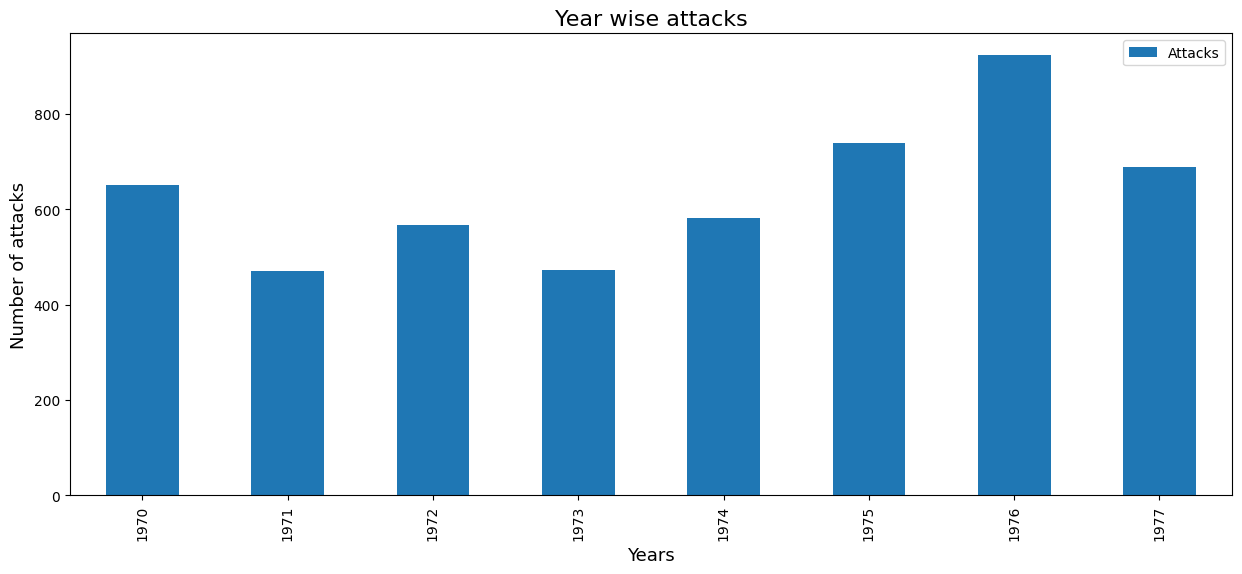

In [20]:
Attacks.plot(kind="bar",figsize=(15,6),fontsize=10)
plt.title("Year wise attacks",fontsize=16)
plt.xlabel("Years",fontsize=13)
plt.ylabel("Number of attacks",fontsize= 13)
plt.show()

Most number of attacks in 2014.
Least number of attacks in 1971.

# Total number of Casualties(killed+wounded) in each year

In [21]:
Casualties=df[["Year","Casualty"]].groupby("Year").sum()
Casualties.head()

Casualty
Year          
1970     386.0
1971     255.0
1972     975.0
1973     865.0
1974    1404.0

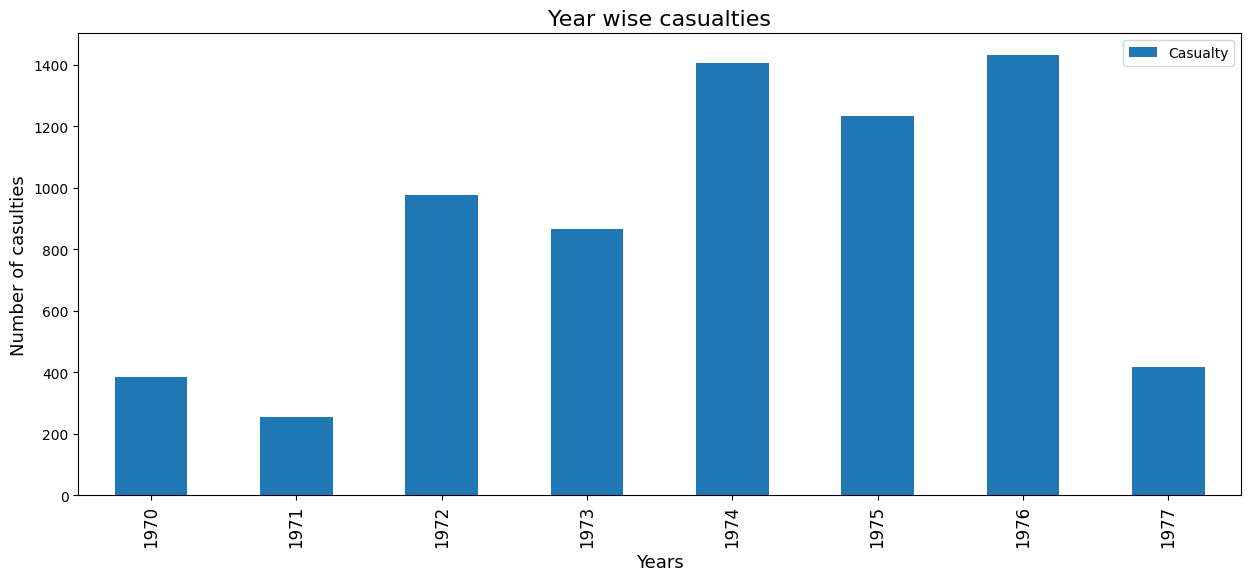

In [22]:
Casualties.plot(kind="bar",figsize=(15,6),fontsize=10)
plt.title("Year wise casualties",fontsize=16)
plt.xlabel("Years",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of casulties",fontsize= 13)
plt.show()

Most number of casualties in 2014.
Least number of casualties in 1970.

# Total number of Killed in each Year

In [23]:
Kill=df[["Year","killed"]].groupby("Year").sum()
Kill.head()

killed
Year        
1970   174.0
1971   173.0
1972   566.0
1973   370.0
1974   539.0

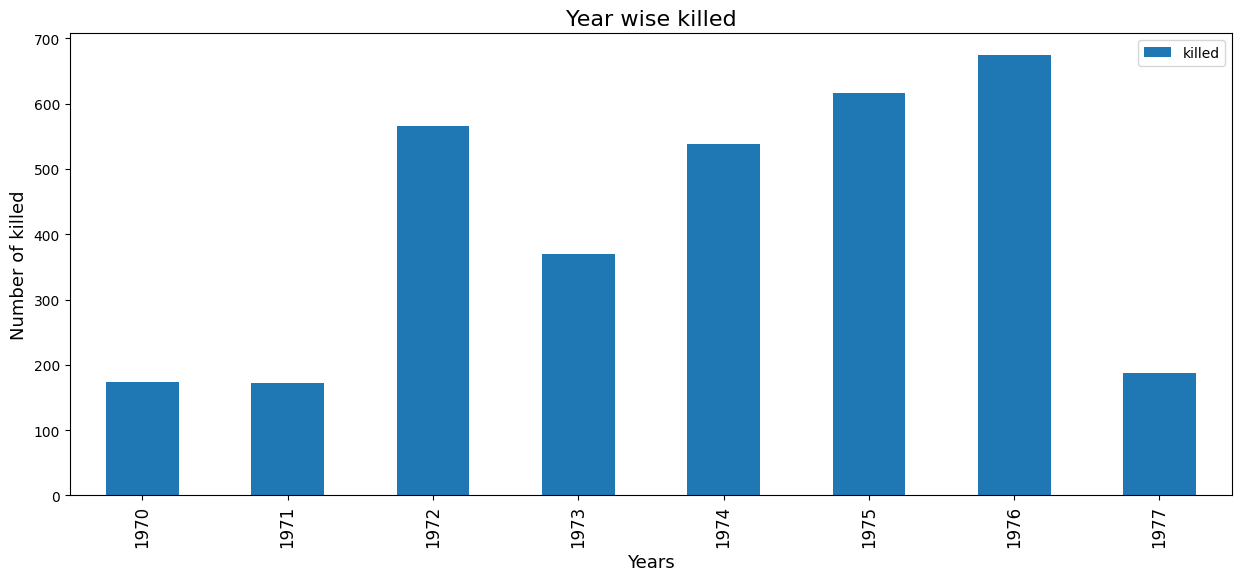

In [24]:
Kill.plot(kind="bar",figsize=(15,6),fontsize=10)
plt.title("Year wise killed",fontsize=16)
plt.xlabel("Years",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of killed",fontsize= 13)
plt.show()

Most number of killed people in 2014.
Least number of killed people in 1970.

# Total number of wounded in each year

In [25]:
Wound=df[["Year","Wounded"]].groupby("Year").sum()
Wound.head()

Wounded
Year         
1970    212.0
1971     82.0
1972    409.0
1973    495.0
1974    865.0

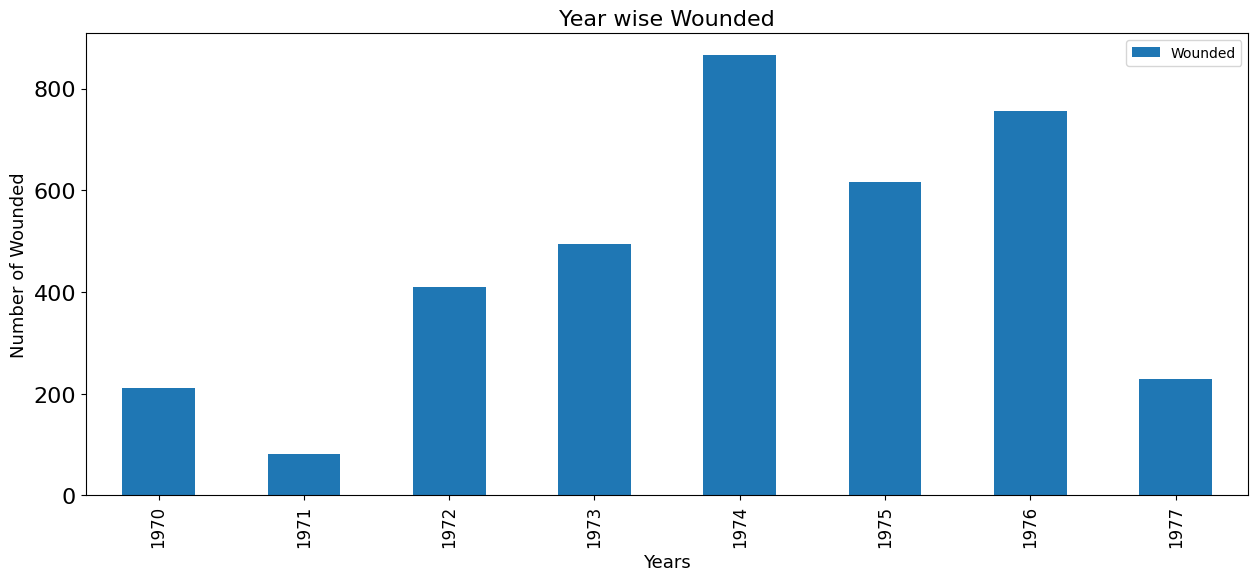

In [26]:
Wound.plot(kind="bar",figsize=(15,6),fontsize=16)
plt.title("Year wise Wounded",fontsize=16)
plt.xlabel("Years",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Wounded",fontsize= 13)
plt.show()

Most number of Wounded people in 2015.
Least number of Wounded people in 1971


# Distribution of Terrorist Attacks over regions from 1970-2017

In [27]:
Region_a=pd.crosstab(df.Year,df.Region)
Region_a.head()

Region  Australasia & Oceania  Central America & Caribbean  East Asia  \
Year                                                                    
1970                        1                            7          2   
1971                        1                            5          1   
1972                        8                            3          0   
1973                        1                            6          2   
1974                        1                           11          4   

Region  Eastern Europe  Middle East & North Africa  North America  \
Year                                                                
1970                12                          28            472   
1971                 5                          55            247   
1972                 1                          53             73   
1973                 1                          19             64   
1974                 2                          42            111   

Region  South America  South Asia  Southeast Asia  Sub-Saharan Africa  \
Year                                                                    
1970               65           1              10                   3   
1971               24           0               6                   2   
1972               33           1              16                   4   
1973               83           1               2                   4   
1974               81           2               3                   7   

Region  Western Europe  
Year                    
1970                50  
1971               125  
1972               376  
1973               290  
1974               317

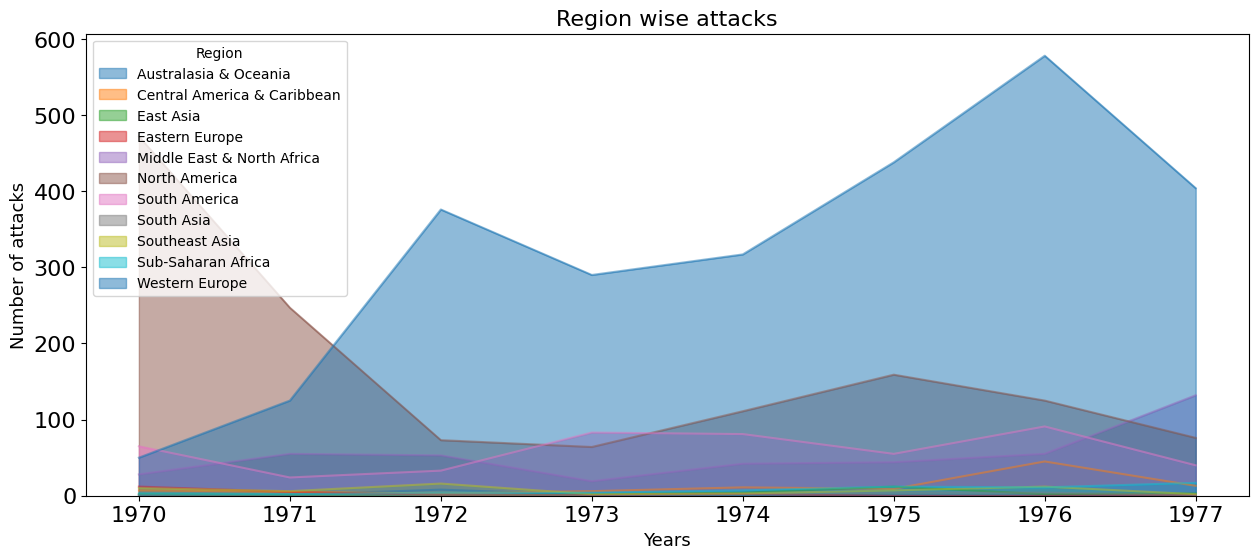

In [28]:
Region_a.plot(kind="area",stacked=False,alpha=0.5,figsize=(15,6),fontsize=16)
plt.title("Region wise attacks",fontsize=16)
plt.xlabel("Years",fontsize=13)
plt.ylabel("Number of attacks",fontsize= 13)
plt.show()

In [29]:
Region_t=Region_a.transpose()
Region_t["Total"]=Region_t.sum(axis=1)
x=Region_t["Total"].sort_values(ascending=False)
x

Region
Western Europe                 2578
North America                  1327
South America                   472
Middle East & North Africa      428
Central America & Caribbean      99
Sub-Saharan Africa               60
Southeast Asia                   58
East Asia                        26
Eastern Europe                   22
South Asia                       14
Australasia & Oceania            12
Name: Total, dtype: int64

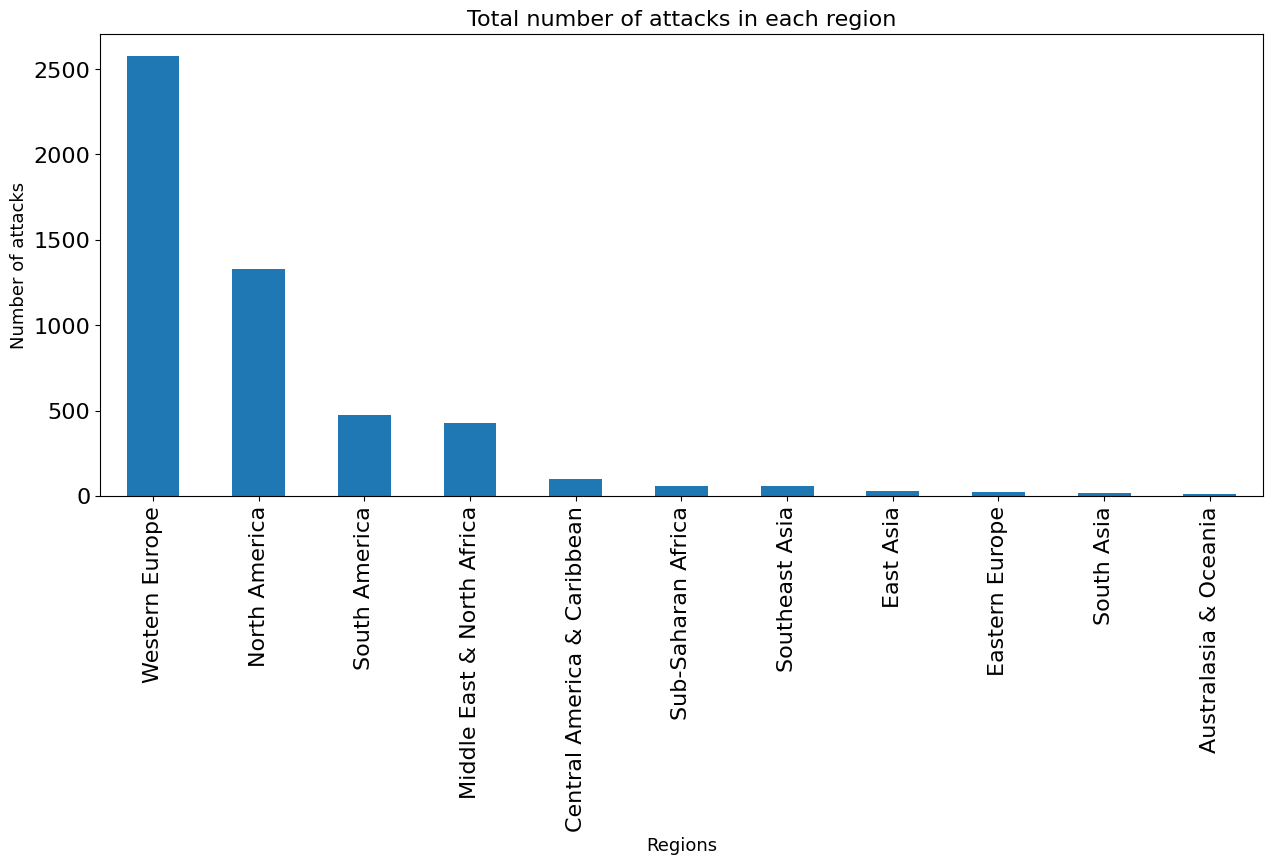

In [30]:
x.plot(kind="bar",figsize=(15,6),fontsize=16)
plt.title("Total number of attacks in each region",fontsize=16)
plt.xlabel("Regions",fontsize=13)
plt.ylabel("Number of attacks",fontsize= 13)
plt.show()

Most number of attacks region:in Middle East & North Africa.
Least nummber of attacks region:in Australasia & Oceania.

# Region wise Casualties

In [31]:
rc=df[["Region","Casualty"]].groupby("Region").sum().sort_values(by="Casualty",ascending=False)
rc

Casualty
Region                               
Western Europe                 3745.0
Middle East & North Africa     1130.0
North America                   788.0
South America                   514.0
Southeast Asia                  353.0
Sub-Saharan Africa              168.0
Central America & Caribbean     147.0
Eastern Europe                   43.0
East Asia                        38.0
South Asia                       38.0
Australasia & Oceania             1.0

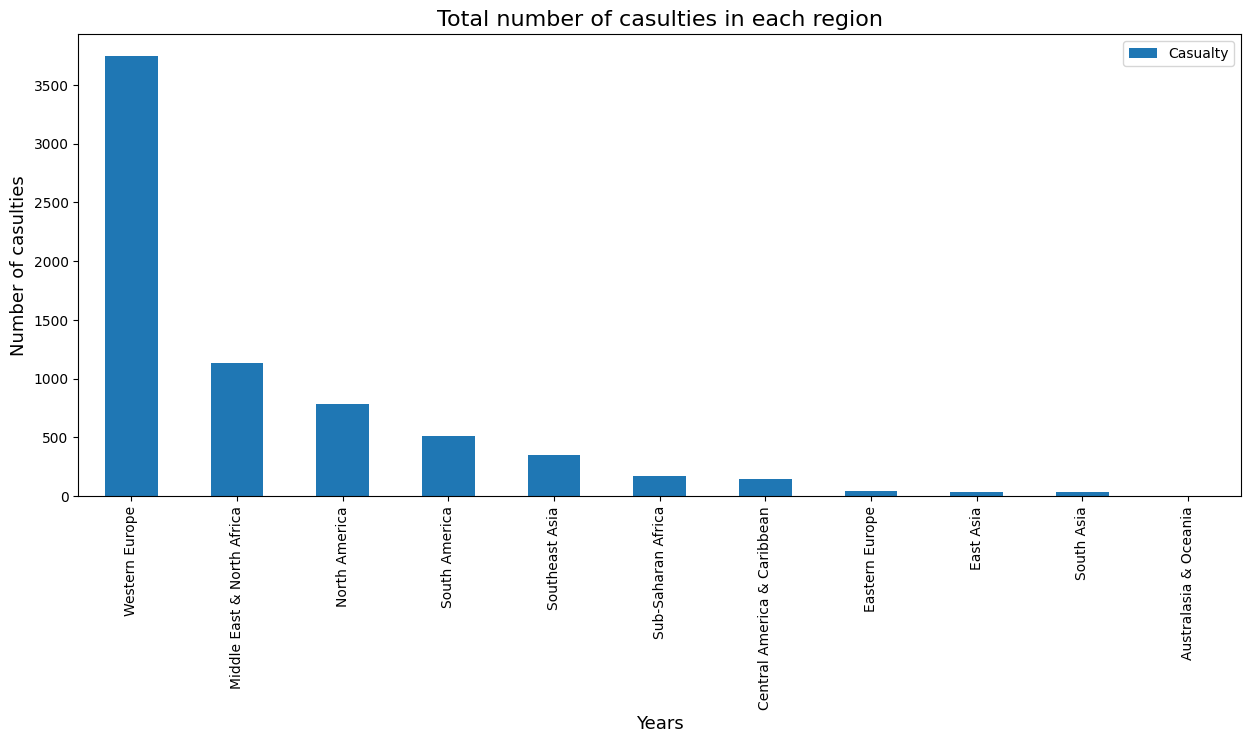

In [32]:
rc.plot(kind="bar",figsize=(15,6))
plt.title("Total number of casulties in each region",fontsize=16)
plt.xlabel("Years",fontsize=13)
plt.ylabel("Number of casulties",fontsize= 13)
plt.show()

Most number of casualties region:in Middle East & North Africa.
Least number of casualties region:Australasia & Oceania

# Region wise Killed

In [33]:
rk=df[["Region","killed"]].groupby("Region").sum().sort_values(by="killed",ascending=False)
rk

killed
Region                             
Western Europe               2051.0
South America                 327.0
Middle East & North Africa    258.0
North America                 228.0
Southeast Asia                180.0
Central America & Caribbean   125.0
Sub-Saharan Africa             62.0
Eastern Europe                 29.0
East Asia                      28.0
South Asia                     11.0
Australasia & Oceania           1.0

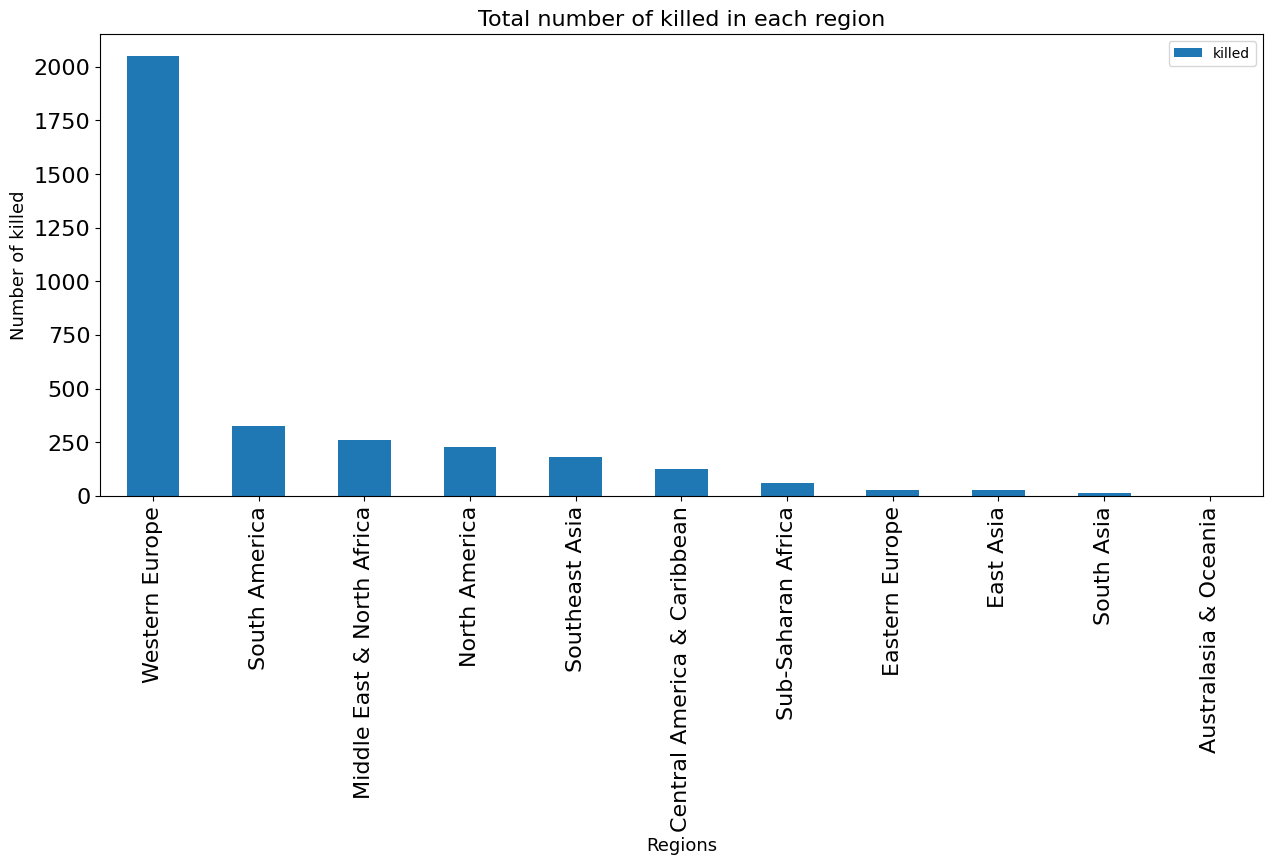

In [34]:
rk.plot(kind="bar",figsize=(15,6),fontsize=16)
plt.title("Total number of killed in each region",fontsize=16)
plt.xlabel("Regions",fontsize=13)
plt.ylabel("Number of killed",fontsize= 13)
plt.show()

Most number of killed in region: Middle East & North Africa. Least number of killed in region:Australasia & Oceania

# Region wise Wounded

In [35]:
rw=df[["Region","Wounded"]].groupby("Region").sum().sort_values(by="Wounded",ascending=False)
rw

Wounded
Region                              
Western Europe                1694.0
Middle East & North Africa     872.0
North America                  560.0
South America                  187.0
Southeast Asia                 173.0
Sub-Saharan Africa             106.0
South Asia                      27.0
Central America & Caribbean     22.0
Eastern Europe                  14.0
East Asia                       10.0
Australasia & Oceania            0.0

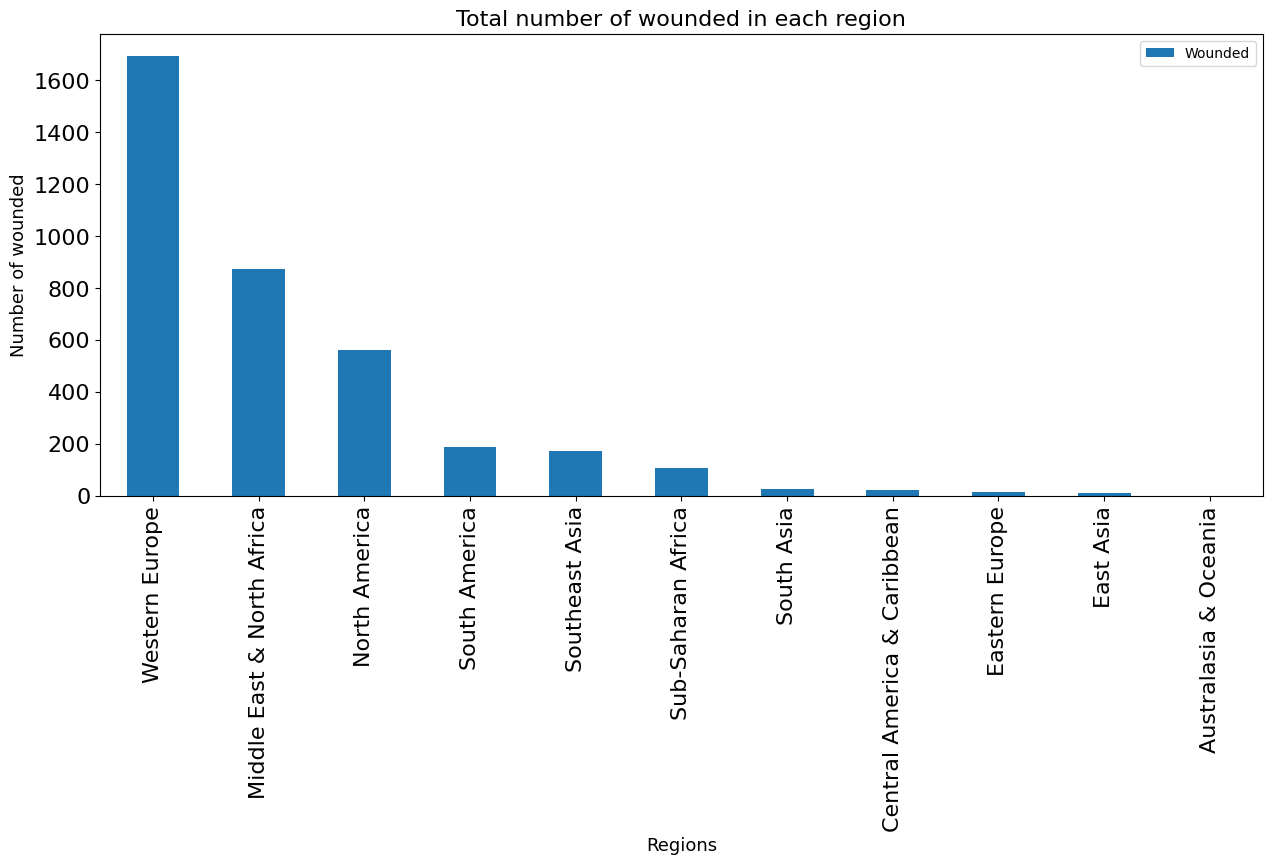

In [36]:
rw.plot(kind="bar",figsize=(15,6),fontsize=16)
plt.title("Total number of wounded in each region",fontsize=16)
plt.xlabel("Regions",fontsize=13)
plt.ylabel("Number of wounded",fontsize= 13)
plt.show()

Most number of wounded in region:in Middle East & North Africa. Least number of wounded in region:Australasia & Oceania

# Country wise Attacks

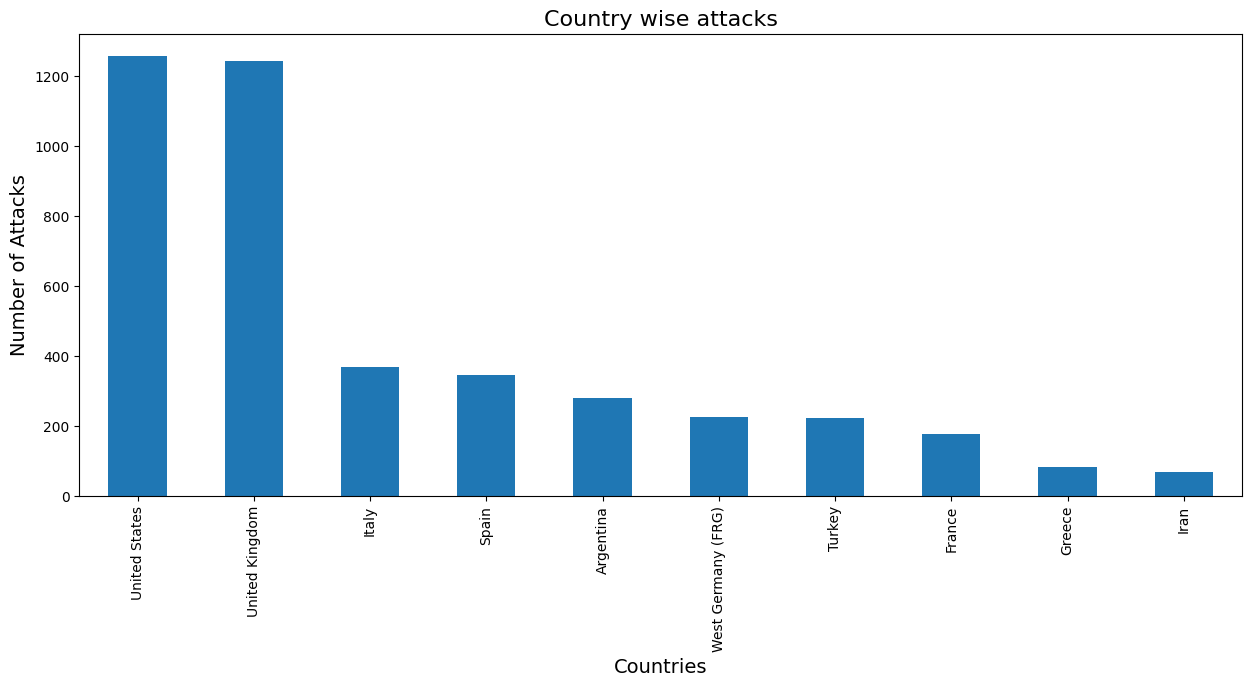

In [37]:
Country_t=df["Country"].value_counts().head(10)
Country_t.plot(kind="bar",figsize=(15,6))
plt.title("Country wise attacks",fontsize=16)
plt.xlabel("Countries",fontsize=14)
plt.ylabel("Number of Attacks",fontsize= 14)
plt.show()

Most number of attacks:Iraq. Least number of attacks:Turkey

# Country wise Casualties

In [38]:
cnc=df[["Country","Casualty"]].groupby("Country").sum().sort_values(by="Casualty",ascending=False).head(20)
cnc

Casualty
Country                     
United Kingdom        2517.0
United States          697.0
Israel                 502.0
Argentina              432.0
Italy                  374.0
Iraq                   298.0
Philippines            226.0
Spain                  216.0
Greece                 170.0
West Germany (FRG)     156.0
Turkey                 145.0
Kenya                  127.0
France                 120.0
Mexico                  82.0
South Vietnam           81.0
Lebanon                 77.0
Barbados                73.0
Ireland                 58.0
Syria                   51.0
Switzerland             51.0

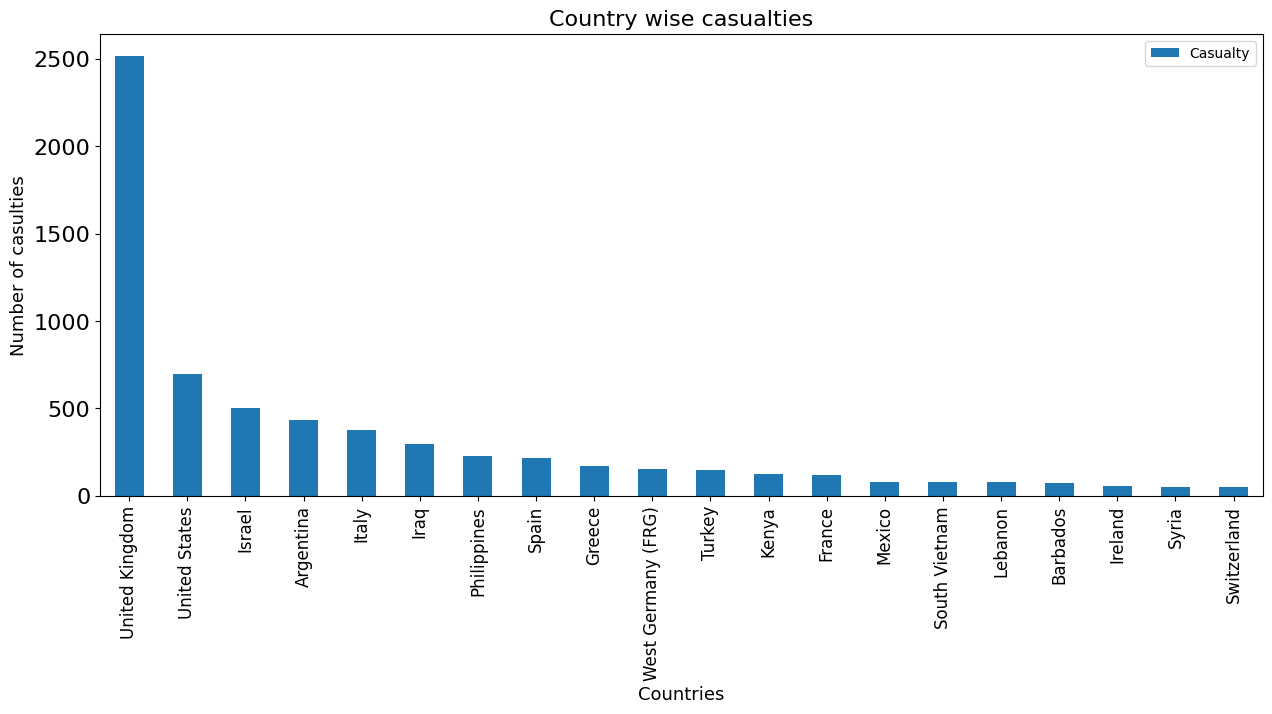

In [39]:
cnc.plot(kind="bar",figsize=(15,6),fontsize=16)
plt.title("Country wise casualties",fontsize=16)
plt.xlabel("Countries",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of casulties",fontsize= 13)
plt.show()

Most number of casualties:Iraq. Least number of casualties:Pillippines

# Country wise Killed

In [40]:
cnk=df[["Country","killed"]].groupby("Country").sum().sort_values(by="killed",ascending=False).head(20)
cnk

killed
Country                   
United Kingdom      1537.0
Argentina            298.0
United States        154.0
Israel               132.0
Greece               114.0
Italy                103.0
Spain                 99.0
Philippines           94.0
South Vietnam         81.0
Barbados              73.0
Mexico                72.0
Ireland               58.0
Switzerland           47.0
West Germany (FRG)    41.0
Lebanon               36.0
Guatemala             33.0
Turkey                32.0
Kenya                 27.0
Czechoslovakia        26.0
Taiwan                25.0

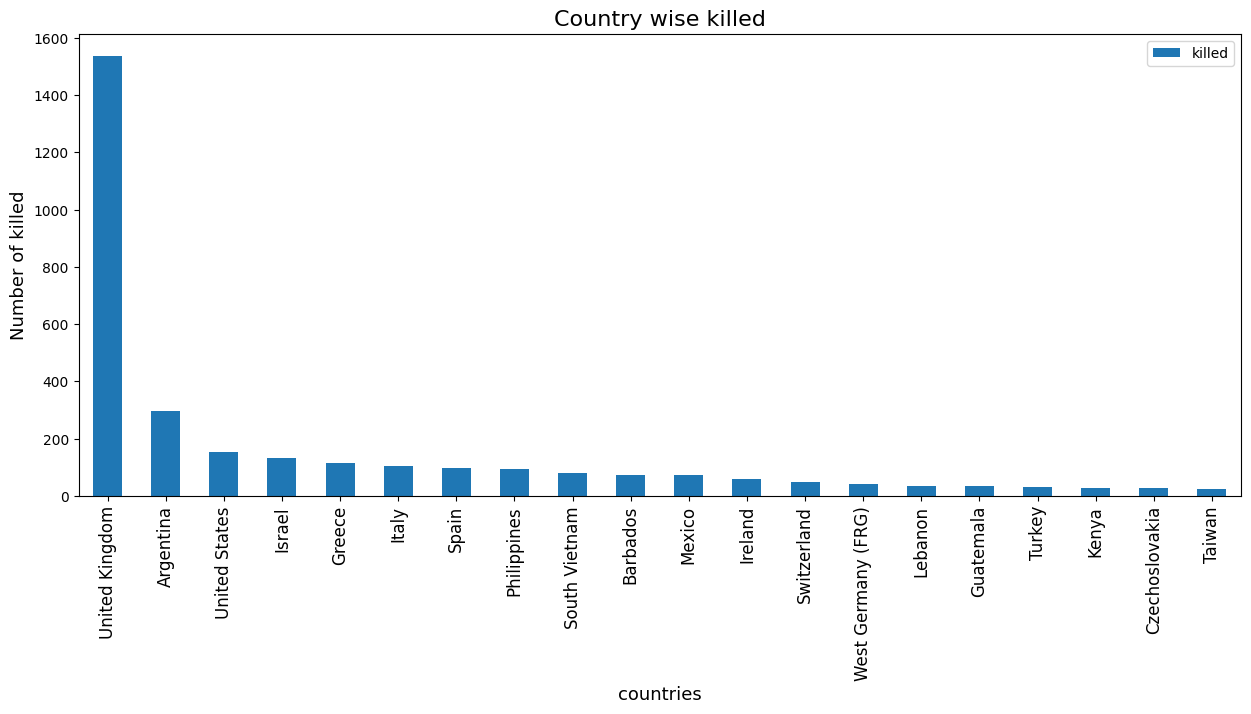

In [41]:
cnk.plot(kind="bar",figsize=(15,6),fontsize=10)
plt.title("Country wise killed",fontsize=16)
plt.xlabel("countries",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of killed",fontsize= 13)
plt.show()

Most number of people killed:Iraq. Least number of people killed:El Salvador

# Country wise Wounded

In [42]:
cnw=df[["Country","Wounded"]].groupby("Country").sum().sort_values(by="Wounded",ascending=False).head(20)
cnw

Wounded
Country                    
United Kingdom        980.0
United States         543.0
Israel                370.0
Iraq                  286.0
Italy                 271.0
Argentina             134.0
Philippines           132.0
Spain                 117.0
West Germany (FRG)    115.0
Turkey                113.0
France                100.0
Kenya                 100.0
Greece                 56.0
Syria                  44.0
Lebanon                41.0
Pakistan               25.0
Thailand               20.0
Brazil                 19.0
Austria                17.0
Peru                   15.0

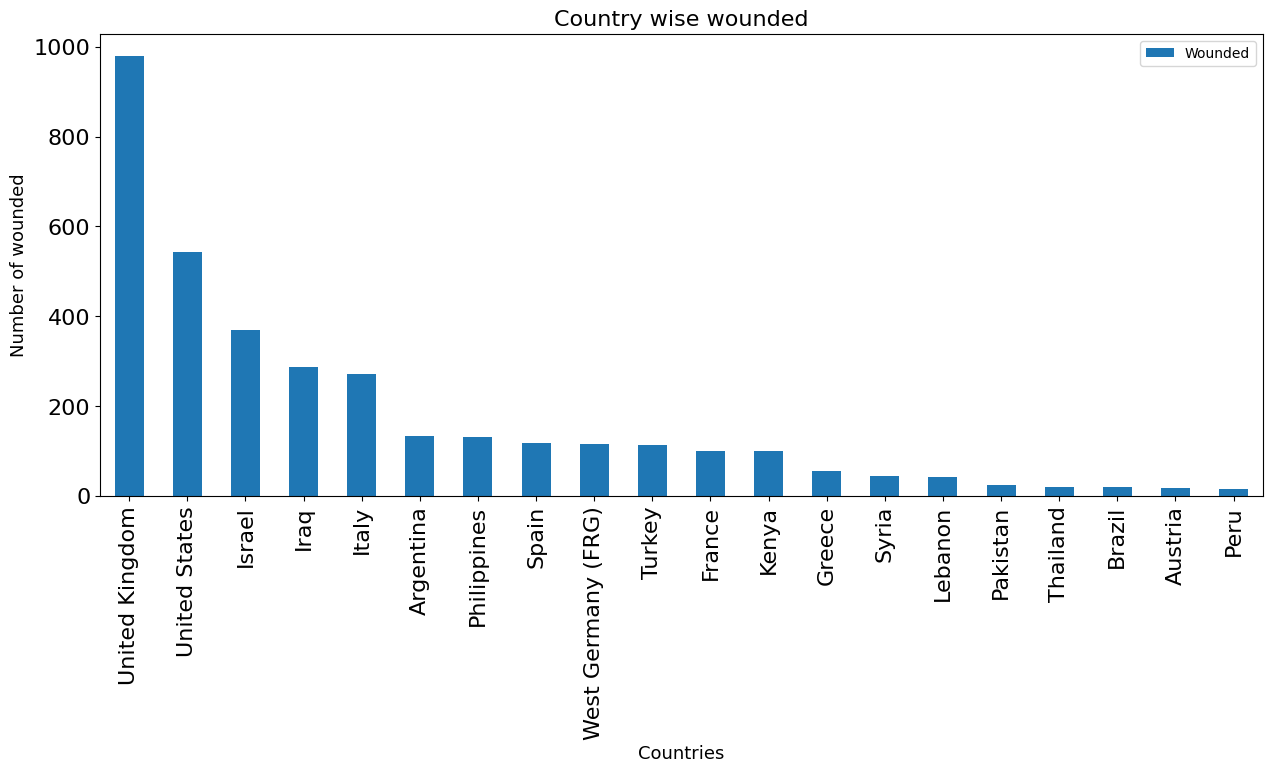

In [43]:
cnw.plot(kind="bar",figsize=(15,6),fontsize=16)
plt.title("Country wise wounded",fontsize=16)
plt.xlabel("Countries",fontsize=13)
plt.ylabel("Number of wounded",fontsize= 13)
plt.show()

Most number of wounded:Iraq. Least number of wounded:Japan

# Total Casualties (killed+wounded) in each City

In [44]:
cc=df[["City","Casualty"]].groupby("City").sum().sort_values(by="Casualty",ascending=False).drop("Unknown").head(20)
cc

Casualty
City                                         
Belfast                                 984.0
London                                  499.0
Buenos Aires                            309.0
Baghdad                                 297.0
New York City                           269.0
Birmingham                              184.0
Athens                                  168.0
Jerusalem                               155.0
Rome                                    138.0
Madrid                                  129.0
Nairobi                                 127.0
Istanbul                                117.0
Brescia                                 113.0
Lod                                      98.0
Maalot                                   95.0
Paris                                    86.0
Pleiku                                   81.0
Tel Aviv                                 74.0
Grantly Adams International Airport      73.0
Londonderry                              72.0

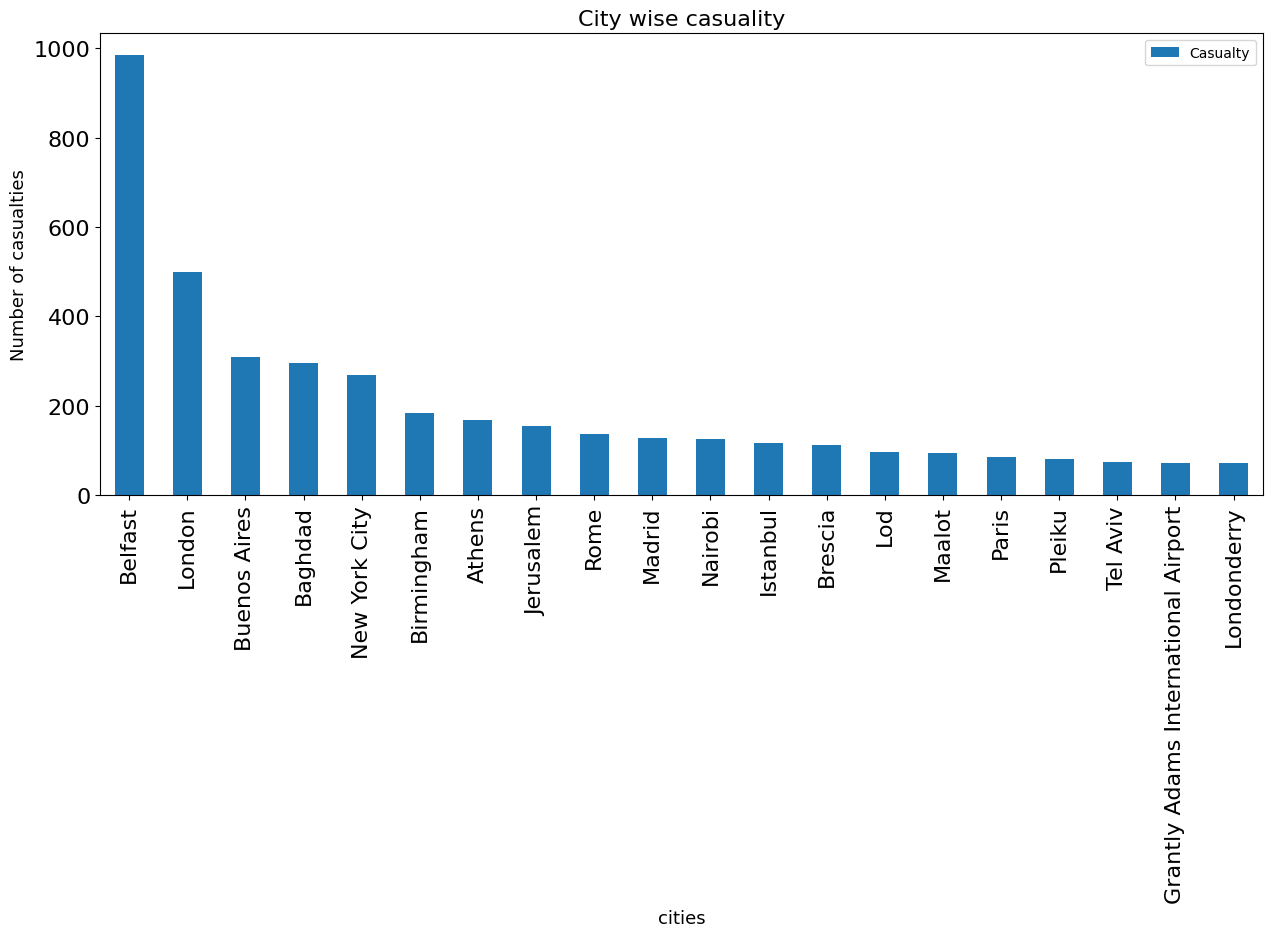

In [45]:
cc.plot(kind="bar",figsize=(15,6),fontsize=16)
plt.title("City wise casuality",fontsize=16)
plt.xlabel("cities",fontsize=13)
plt.ylabel("Number of casualties",fontsize= 13)
plt.show()

Most number of casualties:Baghbad. Least number of casualties:Algiers

# City wise Killed

In [46]:
ck=df[["City","killed"]].groupby("City").sum().sort_values(by="killed",ascending=False).drop("Unknown").head(20)
ck

killed
City                                       
Belfast                               780.0
Buenos Aires                          200.0
Athens                                112.0
Pleiku                                 81.0
Grantly Adams International Airport    73.0
Londonderry                            72.0
Rome                                   69.0
Madrid                                 48.0
Mexico City                            48.0
Zurich                                 47.0
New York City                          37.0
Cauayan                                36.0
Dublin                                 35.0
London                                 31.0
Rosario                                29.0
Crossmaglen                            27.0
Nairobi                                27.0
Formosa                                26.0
Lod                                    26.0
Maalot                                 25.0

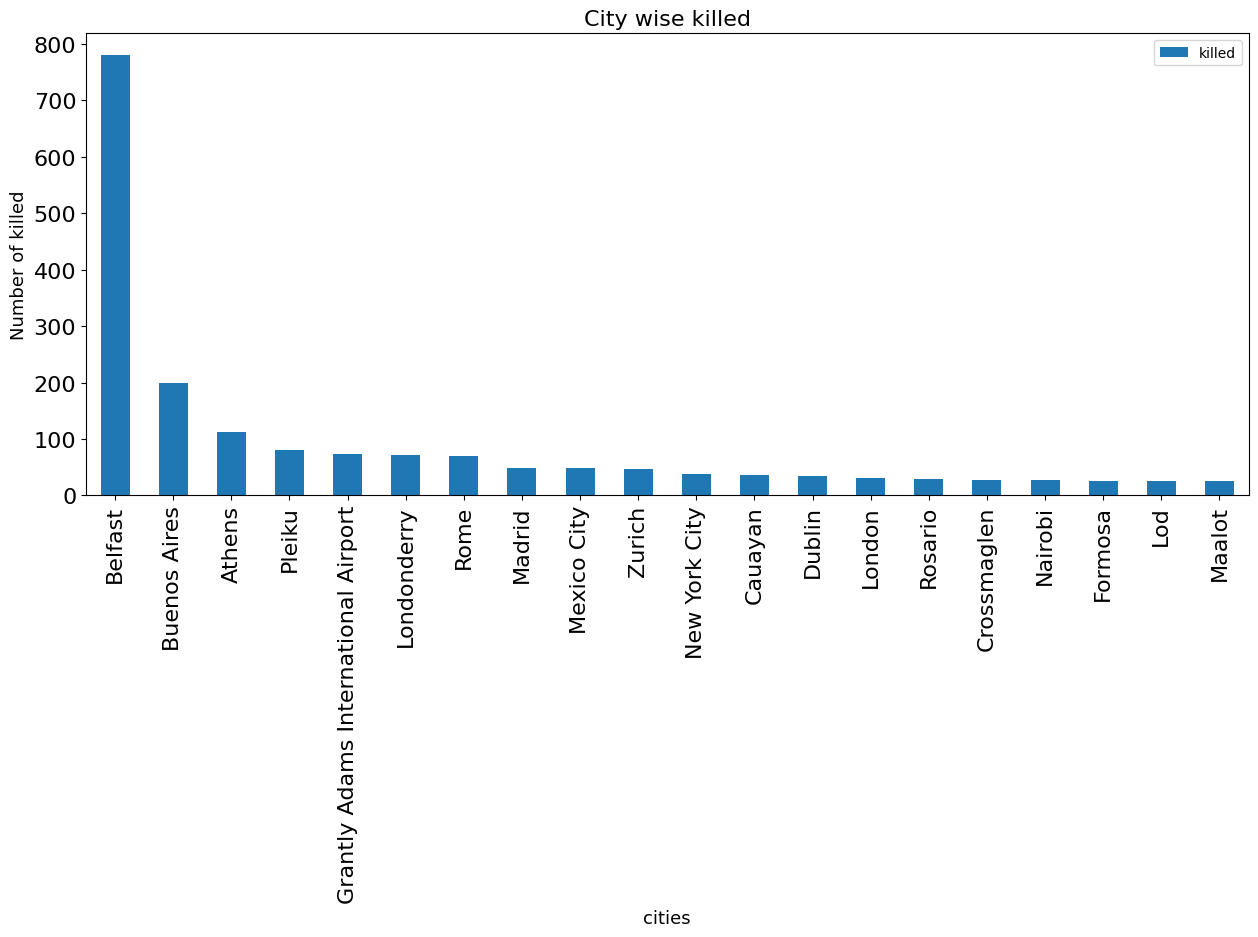

In [47]:
ck.plot(kind="bar",figsize=(15,6),fontsize=16)
plt.title("City wise killed",fontsize=16)
plt.xlabel("cities",fontsize=13)
plt.ylabel("Number of killed",fontsize= 13)
plt.show()


Most number of casualties:Baghbad. Least number of casualties:Tal Afar

# City wise Wounded

In [48]:
cw=df[["City","Wounded"]].groupby("City").sum().sort_values(by="Wounded",ascending=False).drop("Unknown").head(20)
cw

Wounded
City                  
London           468.0
Baghdad          285.0
New York City    232.0
Belfast          204.0
Birmingham       162.0
Jerusalem        143.0
Buenos Aires     109.0
Istanbul         105.0
Brescia          104.0
Nairobi          100.0
Madrid            81.0
Paris             74.0
Lod               72.0
Maalot            70.0
Rome              69.0
Athens            56.0
Tel Aviv          54.0
Frankfurt         49.0
Bologna           49.0
Manila            45.0

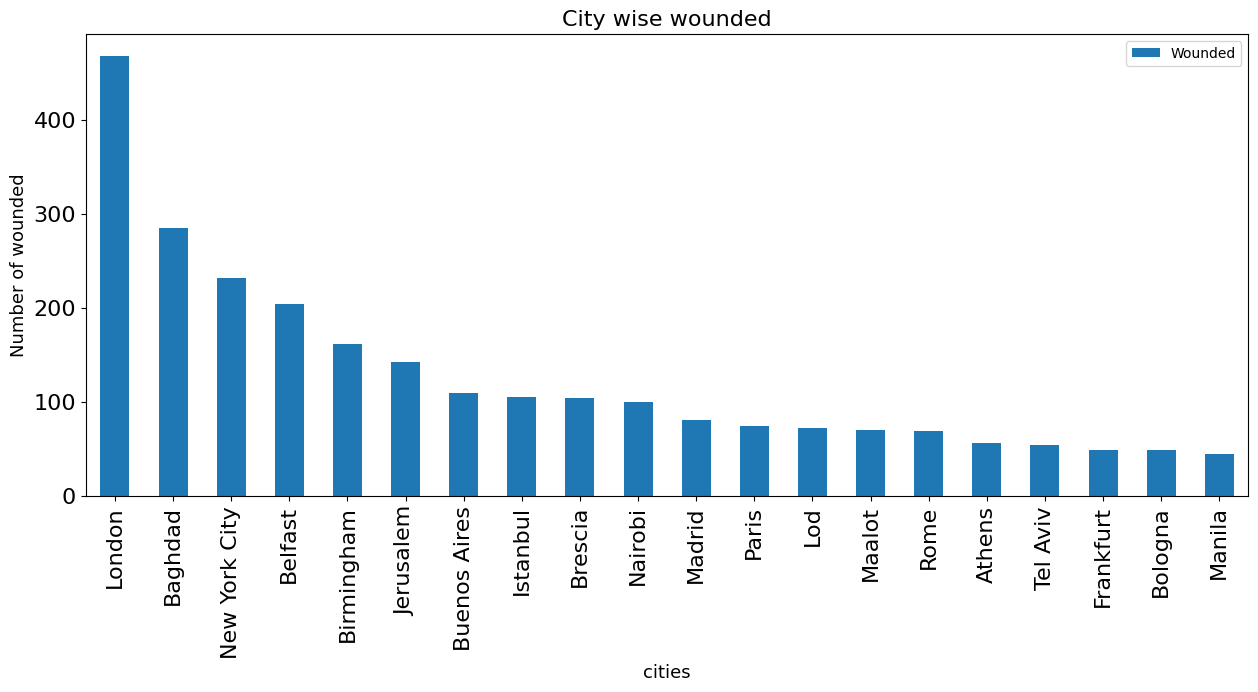

In [49]:
cw.plot(kind="bar",figsize=(15,6),fontsize=16)
plt.title("City wise wounded",fontsize=16)
plt.xlabel("cities",fontsize=13)
plt.ylabel("Number of wounded",fontsize= 13)
plt.show()


Most number of casualties:Baghbad. Least number of casualties:Hillah

# Group wise Attacks

In [50]:
group=df["Group Name"].value_counts().drop("Unknown").head(20)
group

Irish Republican Army (IRA)                              669
Protestant extremists                                    184
Left-Wing Militants                                      169
Ulster Volunteer Force (UVF)                             159
Black September                                          120
Basque Fatherland and Freedom (ETA)                      103
Ulster Freedom Fighters (UFF)                             90
Montoneros (Argentina)                                    88
Black Nationalists                                        82
Ejercito Revolucionaria del Pueblo (ERP) (Argentina)      82
New World Liberation Front (NWLF)                         72
Fuerzas Armadas de Liberacion Nacional (FALN)             72
Student Radicals                                          71
Irish Republican Extremists                               59
Turkish People's Liberation Army                          58
Red Brigades                                              56
Baader-Meinhof Group    

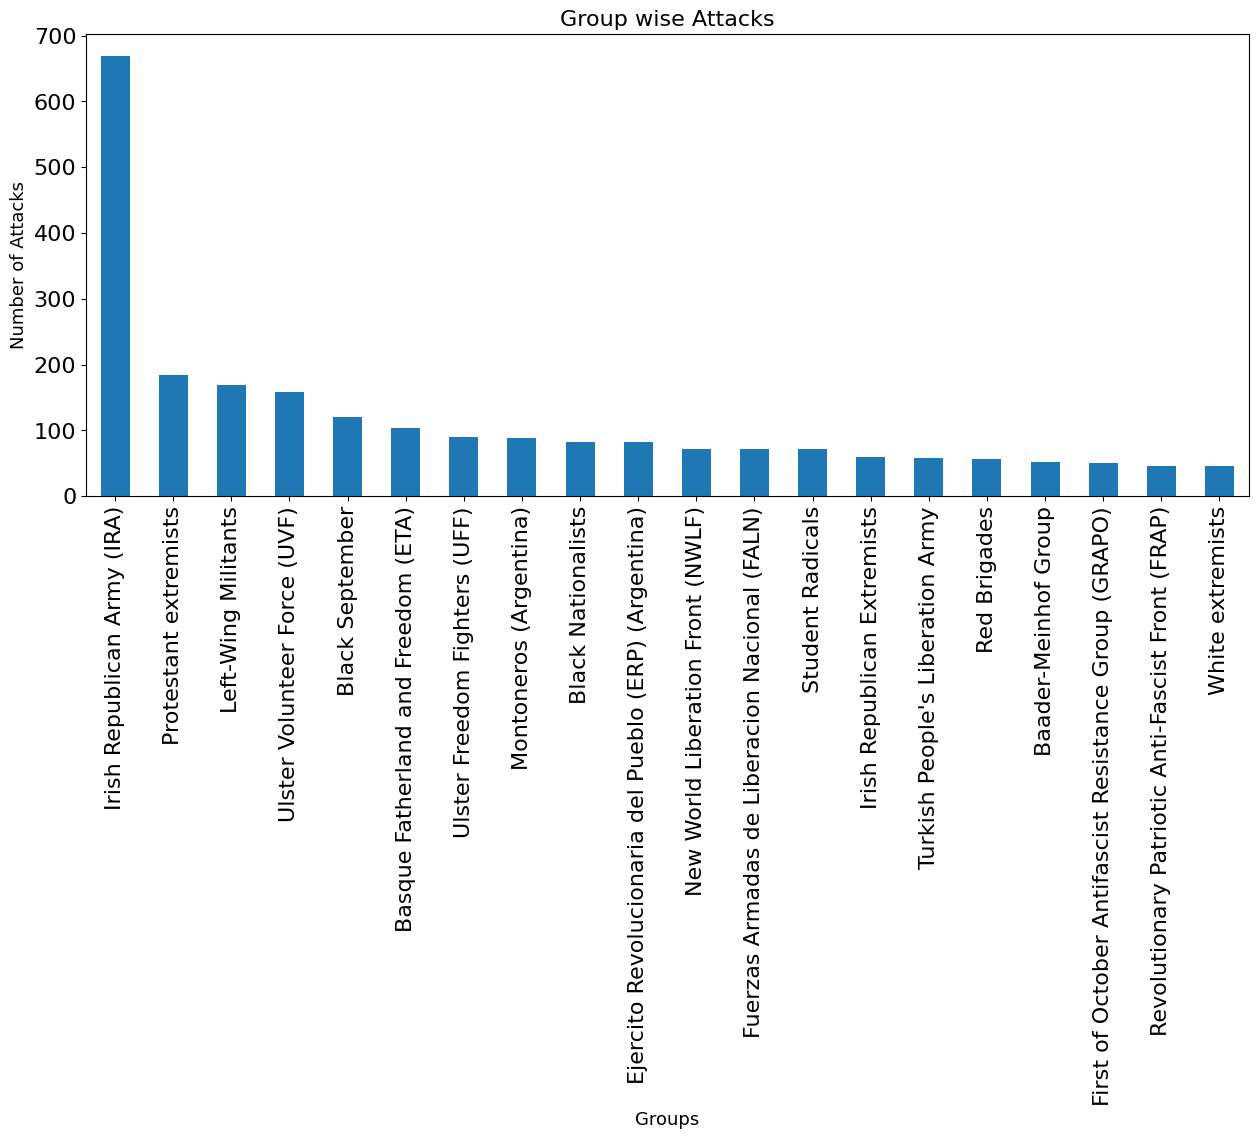

In [51]:
group.plot(kind="bar",figsize=(15,6),fontsize=16)
plt.title("Group wise Attacks",fontsize=16)
plt.xlabel("Groups",fontsize=13)
plt.ylabel("Number of Attacks",fontsize= 13)
plt.show()


Most number of casualties:Taliban. Least number of casualties:Nicaraguan Democratic Force (FDN)

# Group wise Casualties

In [52]:
gc=df[["Group Name","Casualty"]].groupby("Group Name").sum().sort_values(by="Casualty",ascending=False).drop("Unknown").head(20)
gc

Casualty
Group Name                                                  
Irish Republican Army (IRA)                           1715.0
Montoneros (Argentina)                                 296.0
Ulster Volunteer Force (UVF)                           269.0
Popular Front for the Liberation of Palestine (...     260.0
Protestant extremists                                  217.0
Black September                                        199.0
Democratic Front for the Liberation of Palestin...     188.0
Black Order                                            173.0
Popular Front for the Liberation of Palestine, ...     156.0
Croatian Nationalists                                  141.0
Basque Fatherland and Freedom (ETA)                    138.0
Maskini Liberation Front                               127.0
Ulster Freedom Fighters (UFF)                          104.0
Japanese Red Army (JRA)                                101.0
Coordination of the United Revolutionary Organi...      85.0
Irish Republican Extremists                             75.0
Black Panthers                                          74.0
23rd of September Communist League                      72.0
Fuerzas Armadas de Liberacion Nacional (FALN)           71.0
Abu Nidal Organization (ANO)                            57.0

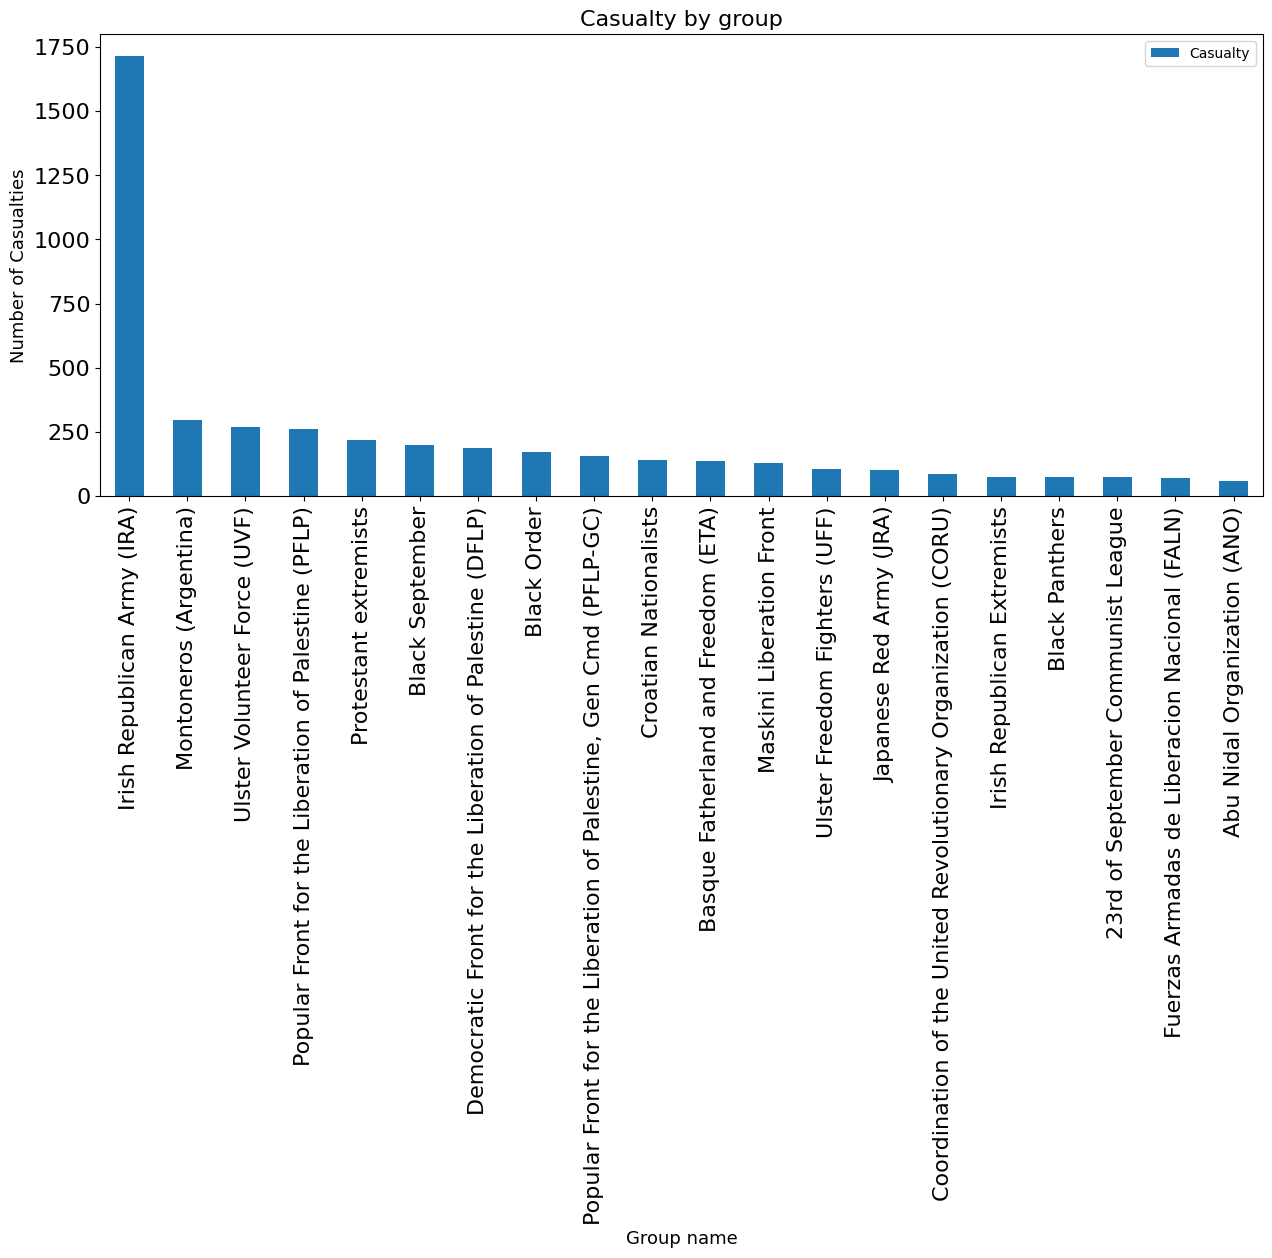

In [53]:
gc.plot(kind="bar",figsize=(15,6),fontsize=16)
plt.title("Casualty by group",fontsize=16)
plt.xlabel("Group name",fontsize=13)
plt.ylabel("Number of Casualties",fontsize= 13)
plt.show()


Most number of casualties:Islamic State of Iraq and the Levant (ISIL). Least number of casualties:Al-Nusrah Front

# Group wise Killed

In [54]:
gk=df[["Group Name","killed"]].groupby("Group Name").sum().sort_values(by="killed",ascending=False).drop("Unknown").head(20)
gk

killed
Group Name                                                
Irish Republican Army (IRA)                          812.0
Ulster Volunteer Force (UVF)                         268.0
Protestant extremists                                217.0
Montoneros (Argentina)                               187.0
Popular Front for the Liberation of Palestine, ...   156.0
Ulster Freedom Fighters (UFF)                        103.0
Black September                                       77.0
Coordination of the United Revolutionary Organi...    75.0
Irish Republican Extremists                           75.0
23rd of September Communist League                    63.0
Popular Front for the Liberation of Palestine (...    55.0
Basque Fatherland and Freedom (ETA)                   54.0
Argentine Anticommunist Alliance (AAA)                51.0
Official Irish Republican Army (OIRA)                 46.0
Croatian Nationalists                                 43.0
Democratic Front for the Liberation of Palestin...    38.0
Guerrilla Army of the Poor (EGP)                      29.0
Maskini Liberation Front                              27.0
First of October Antifascist Resistance Group (...    27.0
Japanese Red Army (JRA)                               26.0

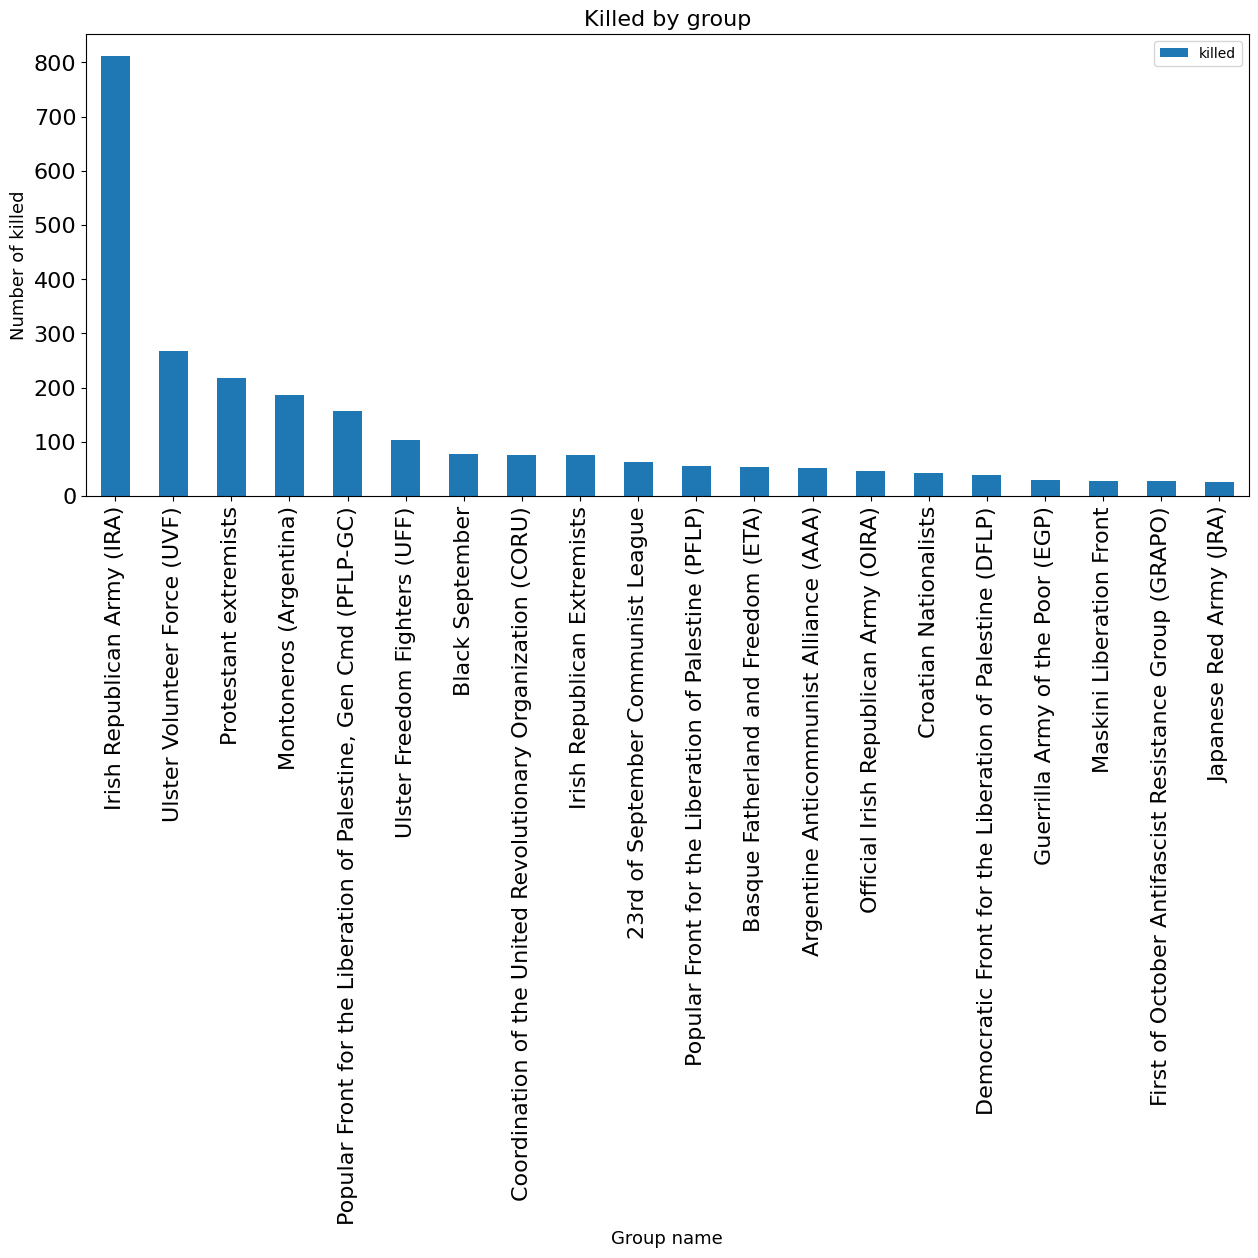

In [55]:
gk.plot(kind="bar",figsize=(15,6),fontsize=16)
plt.title("Killed by group",fontsize=16)
plt.xlabel("Group name",fontsize=13)
plt.ylabel("Number of killed",fontsize= 13)
plt.show()

# Group wise wounded

In [56]:
gw=df[["Group Name","Wounded"]].groupby("Group Name").sum().sort_values(by="Wounded",ascending=False).drop("Unknown").head(20)
gw

Wounded
Group Name                                                 
Irish Republican Army (IRA)                           903.0
Popular Front for the Liberation of Palestine (...    205.0
Black Order                                           152.0
Democratic Front for the Liberation of Palestin...    150.0
Black September                                       122.0
Montoneros (Argentina)                                109.0
Maskini Liberation Front                              100.0
Croatian Nationalists                                  98.0
Basque Fatherland and Freedom (ETA)                    84.0
Japanese Red Army (JRA)                                75.0
Black Panthers                                         68.0
Fuerzas Armadas de Liberacion Nacional (FALN)          67.0
28 May Armenian Organization                           52.0
Baader-Meinhof Group                                   45.0
Abu Nidal Organization (ANO)                           42.0
Palestinians                                           40.0
Anti-Government extremists                             36.0
White extremists                                       32.0
Black Nationalists                                     30.0
Revolutionary Cells                                    29.0

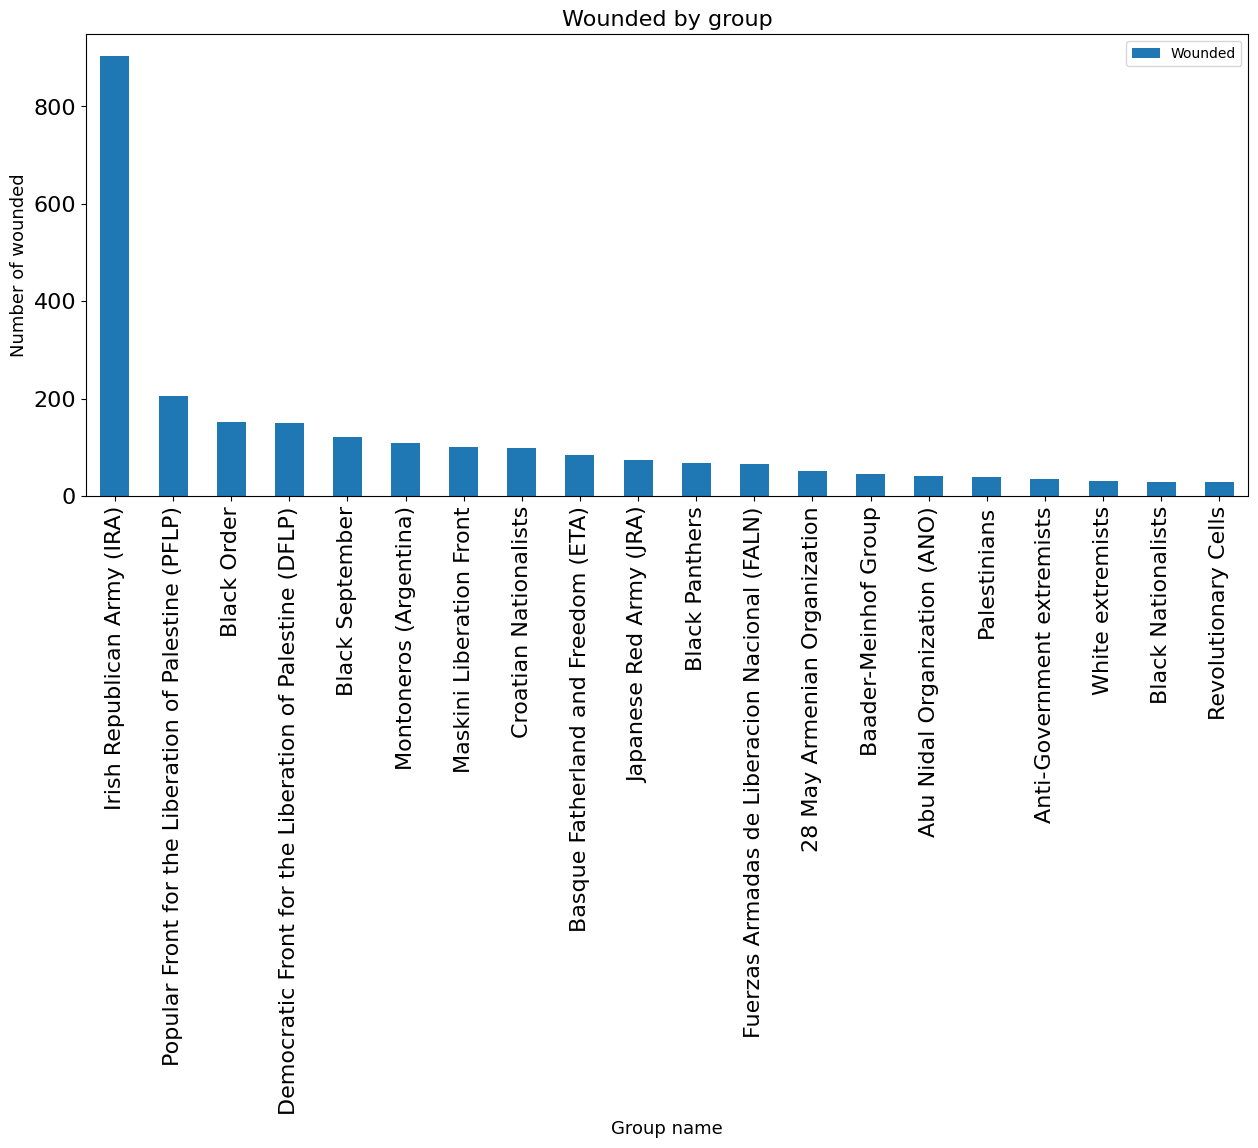

In [57]:
gw.plot(kind="bar",figsize=(15,6),fontsize=16)
plt.title("Wounded by group",fontsize=16)
plt.xlabel("Group name",fontsize=13)
plt.ylabel("Number of wounded",fontsize= 13)
plt.show()

# Types of Attacks

In [58]:
Attack_type=df["AttackType"].value_counts()
Attack_type

Bombing/Explosion                      2308
Assassination                          1141
Armed Assault                           642
Facility/Infrastructure Attack          615
Hostage Taking (Kidnapping)             256
Hijacking                                48
Hostage Taking (Barricade Incident)      44
Unknown                                  28
Unarmed Assault                          13
Hostage Taking (Kid                       1
Name: AttackType, dtype: int64

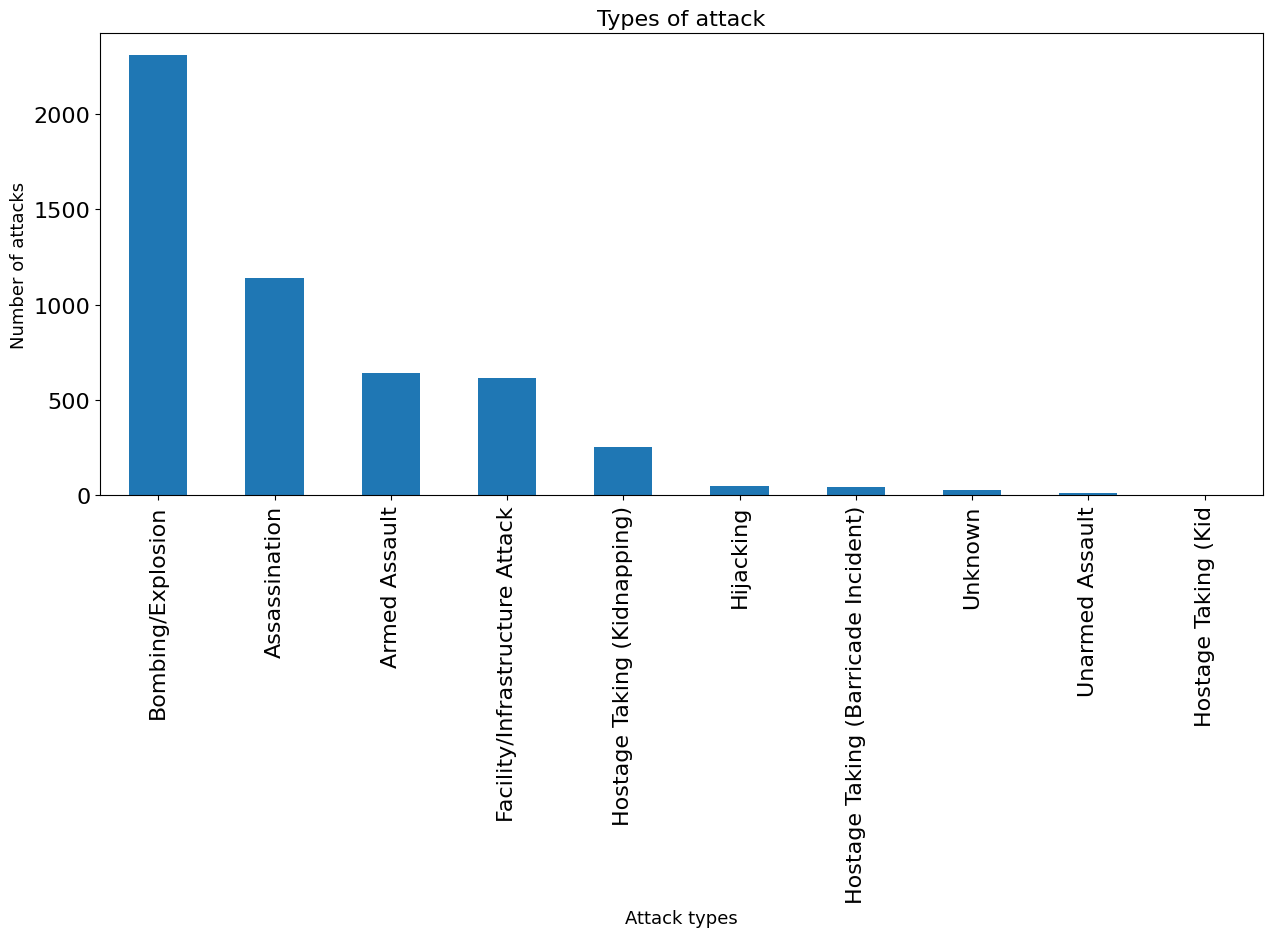

In [59]:
Attack_type.plot(kind="bar",figsize=(15,6),fontsize=16)
plt.title("Types of attack",fontsize=16)
plt.xlabel("Attack types",fontsize=13)
plt.ylabel("Number of attacks",fontsize= 13)
plt.show()

# Type wise Casualties

In [60]:
ac=df[["AttackType","Casualty"]].groupby("AttackType").sum().sort_values(by="Casualty",ascending=False)
ac

Casualty
AttackType                                   
Bombing/Explosion                      4209.0
Assassination                          1264.0
Armed Assault                           862.0
Hostage Taking (Barricade Incident)     267.0
Facility/Infrastructure Attack          124.0
Hijacking                               111.0
Hostage Taking (Kidnapping)              82.0
Unknown                                  39.0
Unarmed Assault                           7.0
Hostage Taking (Kid                       0.0

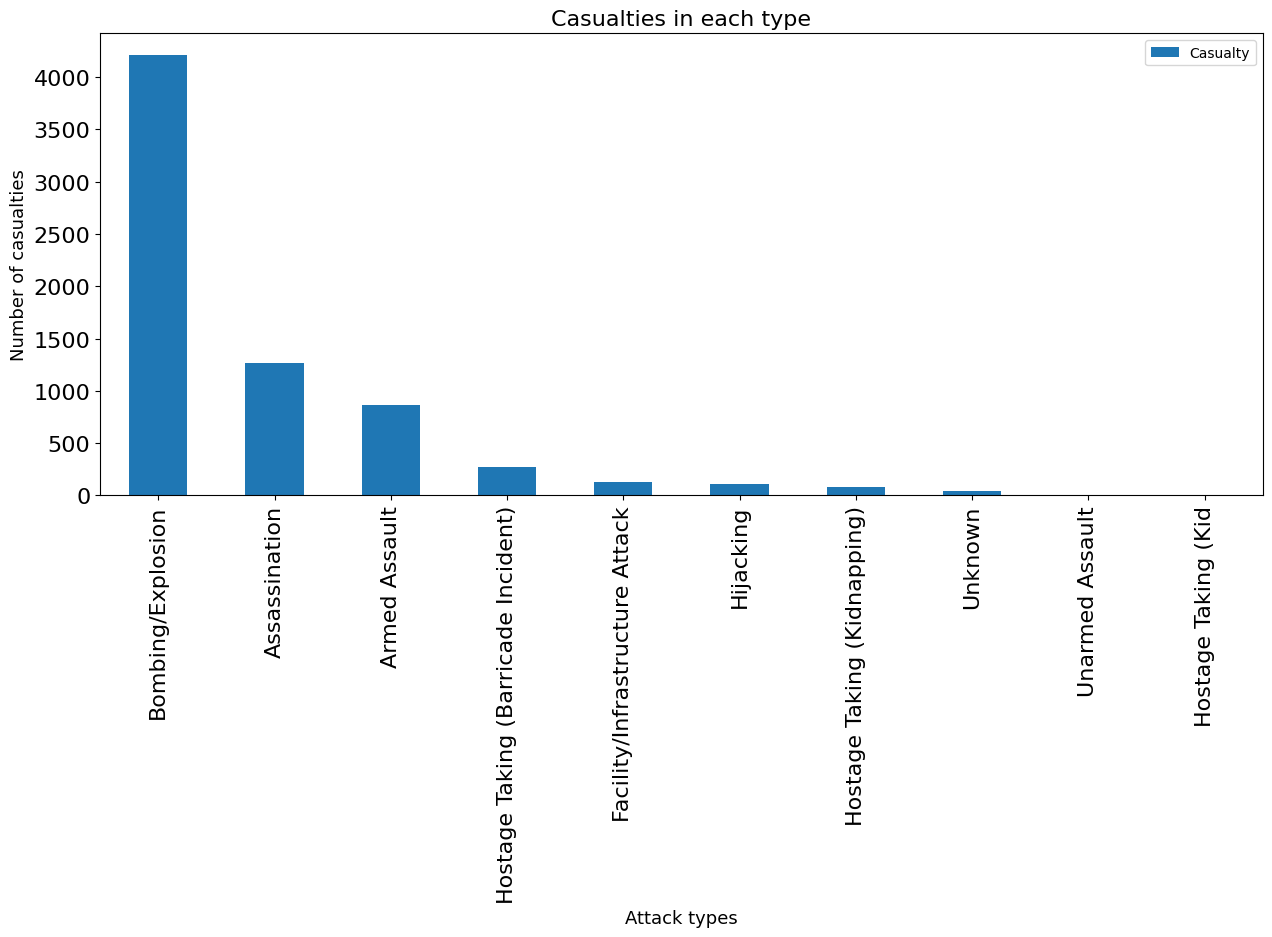

In [61]:
ac.plot(kind="bar",figsize=(15,6),fontsize=16)
plt.title("Casualties in each type",fontsize=16)
plt.xlabel("Attack types",fontsize=13)
plt.ylabel("Number of casualties",fontsize= 13)
plt.show()

# Type wise Killed

In [62]:
ak=df[["AttackType","killed"]].groupby("AttackType").sum().sort_values(by="killed",ascending=False)
ak

killed
AttackType                                 
Bombing/Explosion                    1197.0
Assassination                        1140.0
Armed Assault                         649.0
Hostage Taking (Barricade Incident)   125.0
Hijacking                              71.0
Hostage Taking (Kidnapping)            71.0
Unknown                                28.0
Facility/Infrastructure Attack         18.0
Unarmed Assault                         1.0
Hostage Taking (Kid                     0.0

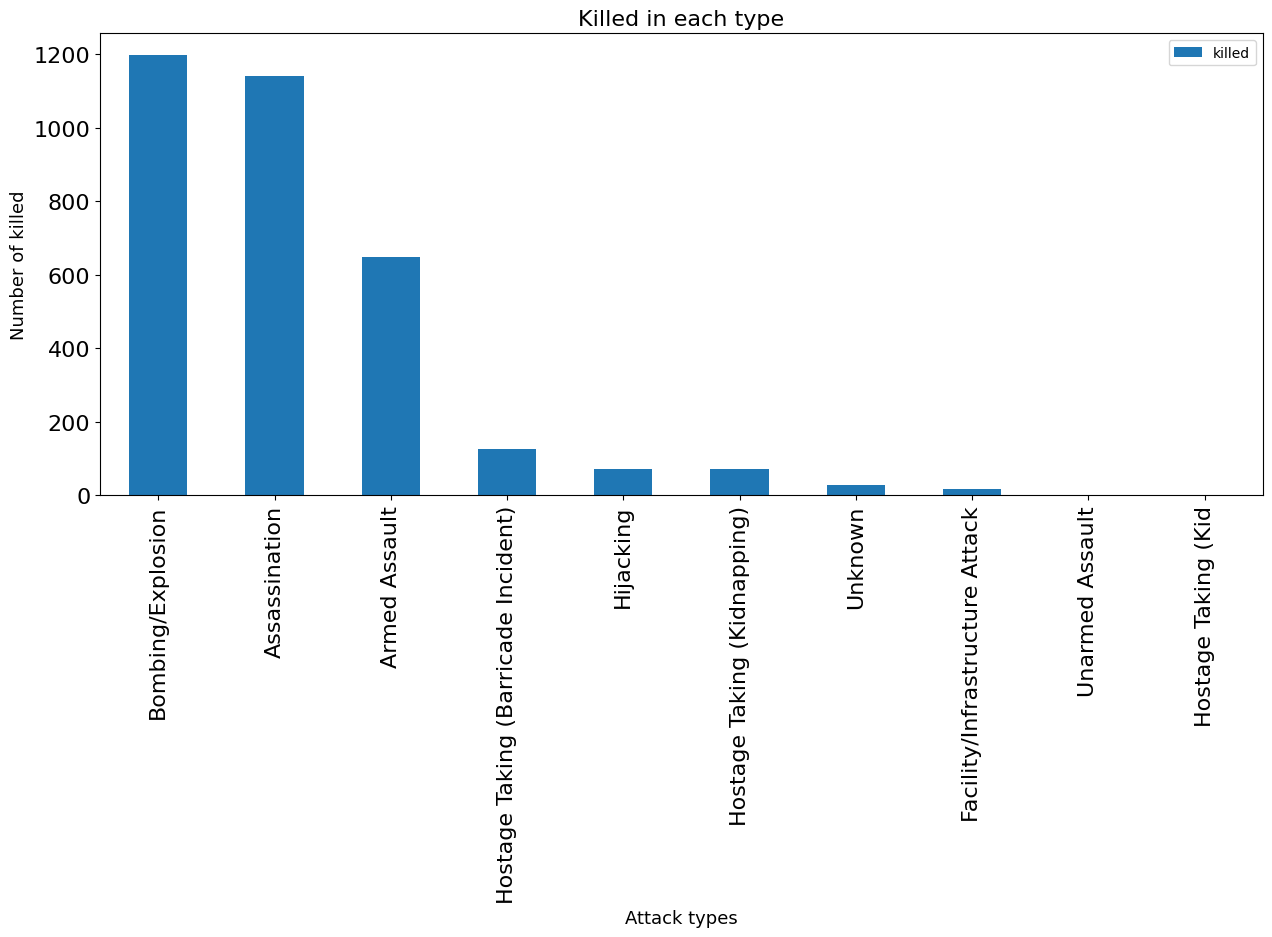

In [63]:
ak.plot(kind="bar",figsize=(15,6),fontsize=16)
plt.title("Killed in each type",fontsize=16)
plt.xlabel("Attack types",fontsize=13)
plt.ylabel("Number of killed",fontsize= 13)
plt.show()

# Type wise Wounded

In [64]:
aw=df[["AttackType","Wounded"]].groupby("AttackType").sum().sort_values(by="Wounded",ascending=False)
aw

Wounded
AttackType                                  
Bombing/Explosion                     3012.0
Armed Assault                          213.0
Hostage Taking (Barricade Incident)    142.0
Assassination                          124.0
Facility/Infrastructure Attack         106.0
Hijacking                               40.0
Hostage Taking (Kidnapping)             11.0
Unknown                                 11.0
Unarmed Assault                          6.0
Hostage Taking (Kid                      0.0

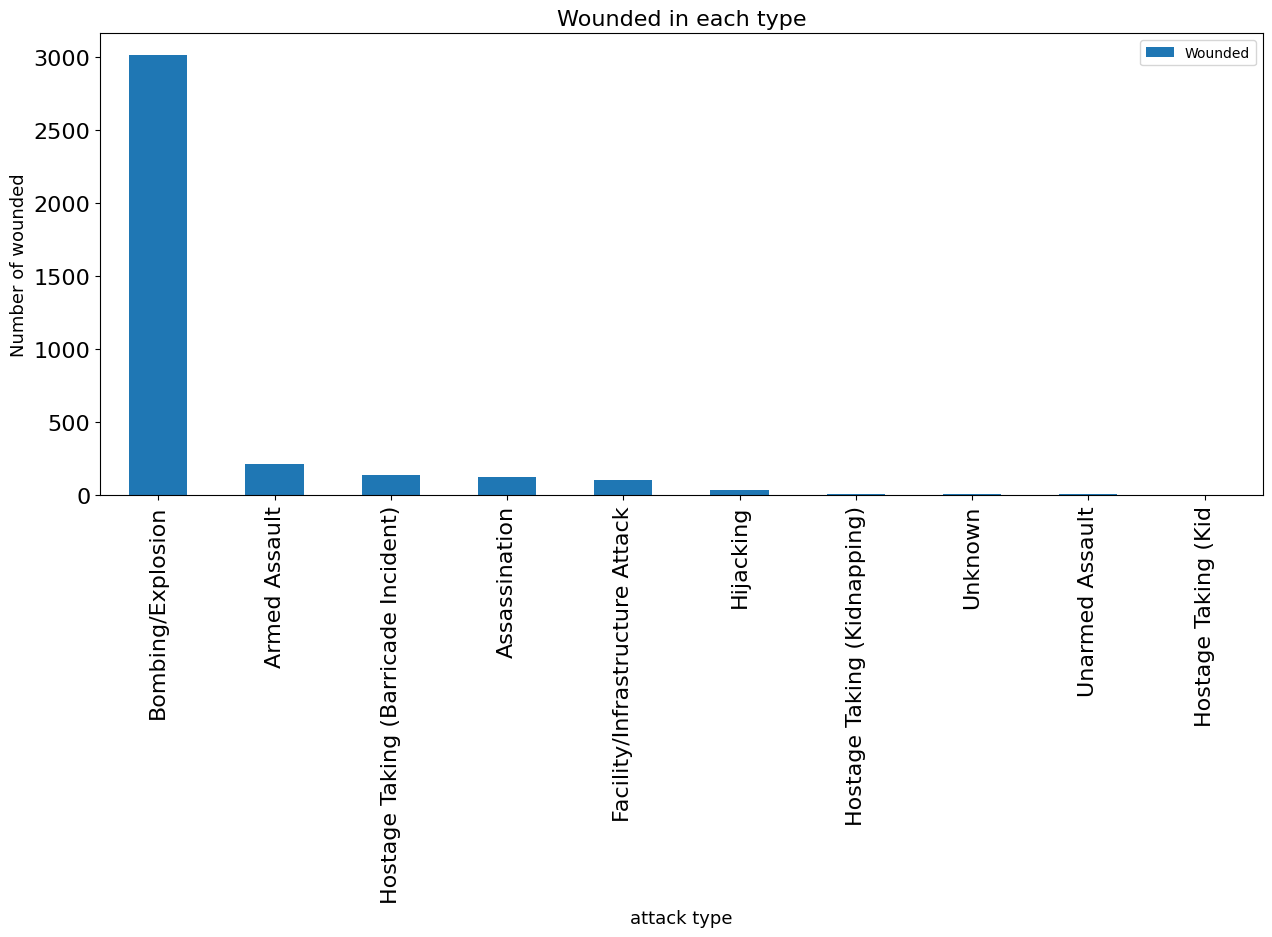

In [65]:
aw.plot(kind="bar",figsize=(15,6),fontsize=16)
plt.title("Wounded in each type",fontsize=16)
plt.xlabel("attack type",fontsize=13)
plt.ylabel("Number of wounded",fontsize= 13)
plt.show()

# Number of attacks by each target type

In [66]:
Target_type=df["targtype1_txt"].value_counts()
Target_type

Business                          1201
Private Citizens & Property        905
Military                           678
Government (Diplomatic)            493
Government (General)               472
Police                             437
Airports & Aircraft                179
Educational Institution            160
Journalists & Media                113
Terrorists/Non-State Militia       100
Utilities                           92
Transportation                      86
Religious Figures/Institutions      47
NGO                                 25
Telecommunication                   22
Violent Political Party             21
Tourists                            18
Maritime                            17
Unknown                             15
Other                                7
Food or Water Supply                 5
Abortion Related                     2
Name: targtype1_txt, dtype: int64

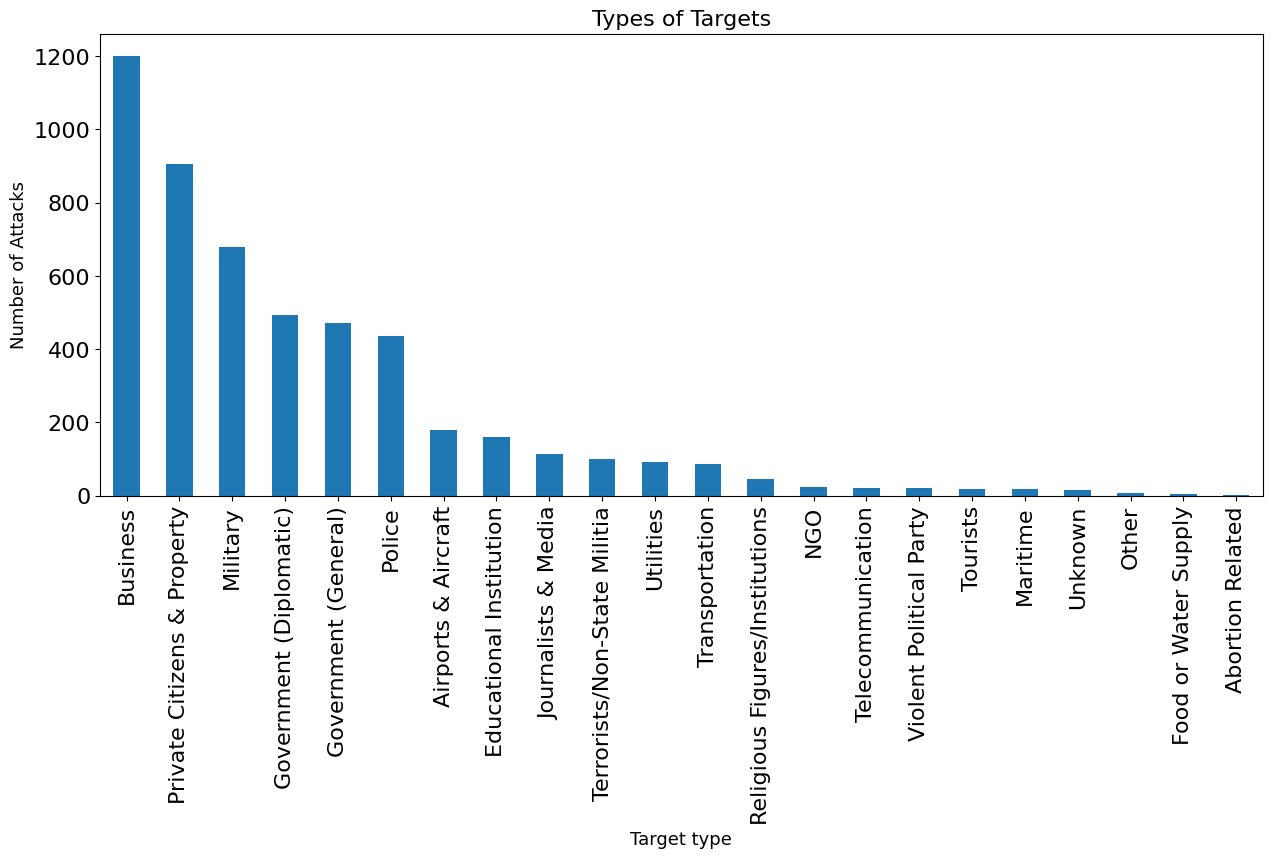

In [67]:
Target_type.plot(kind="bar",figsize=(15,6),fontsize=16)
plt.title("Types of Targets",fontsize=16)
plt.xlabel("Target type",fontsize=13)
plt.ylabel("Number of Attacks",fontsize= 13)
plt.show()

# Casualties by each Types of Targets

In [68]:
tc=df[["targtype1_txt","Casualty"]].groupby("targtype1_txt").sum().sort_values(by="Casualty",ascending=False)
tc

Casualty
targtype1_txt                           
Airports & Aircraft               1373.0
Business                          1303.0
Private Citizens & Property       1234.0
Military                           829.0
Government (General)               592.0
Police                             504.0
Transportation                     285.0
Government (Diplomatic)            262.0
Educational Institution            204.0
Terrorists/Non-State Militia       193.0
Religious Figures/Institutions      57.0
Journalists & Media                 53.0
Unknown                             26.0
Tourists                            17.0
Violent Political Party             11.0
Maritime                             7.0
Telecommunication                    6.0
Utilities                            4.0
NGO                                  4.0
Food or Water Supply                 1.0
Abortion Related                     0.0
Other                                0.0

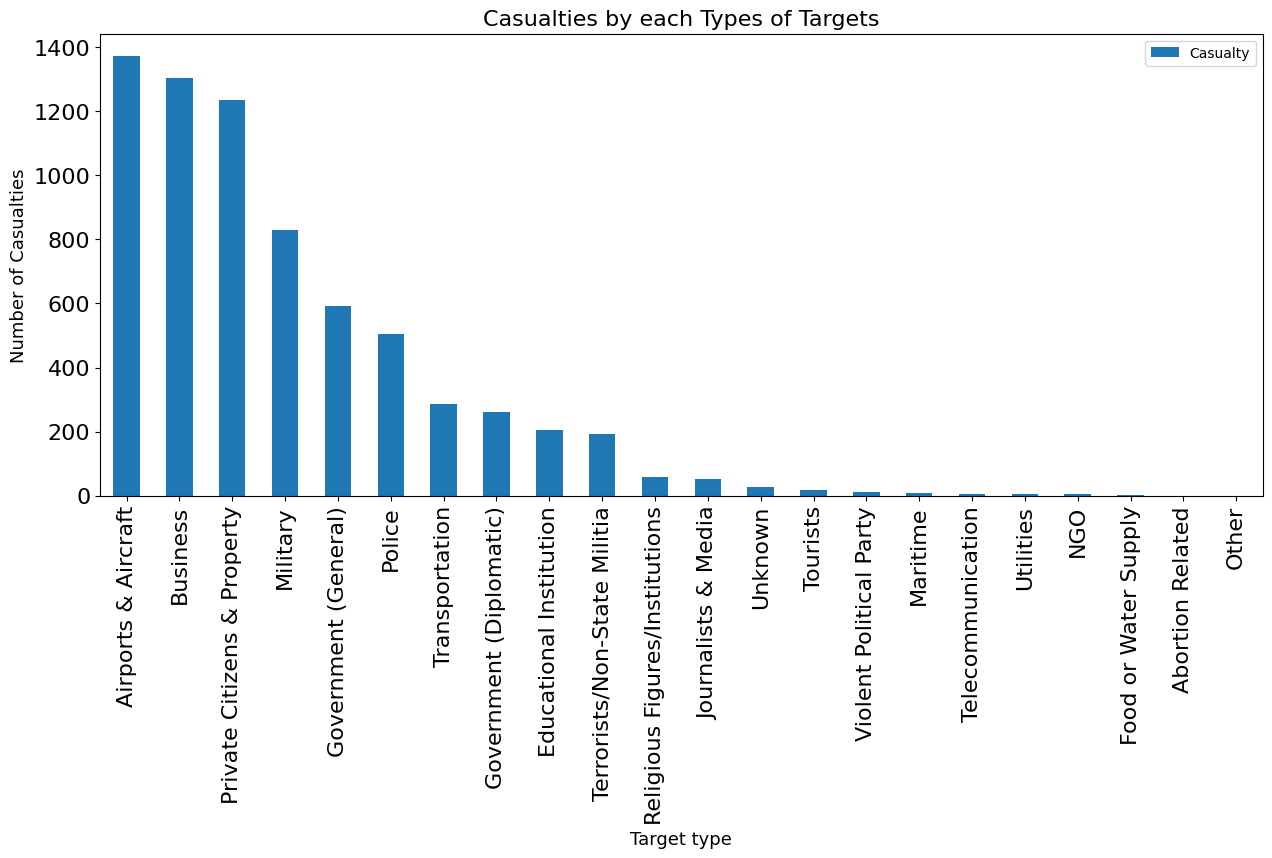

In [69]:
tc.plot(kind="bar",figsize=(15,6),fontsize=16)
plt.title("Casualties by each Types of Targets",fontsize=16)
plt.xlabel("Target type",fontsize=13)
plt.ylabel("Number of Casualties",fontsize= 13)
plt.show()

# Killed by each Types of Targets

In [70]:
tk=df[["targtype1_txt","killed"]].groupby("targtype1_txt").sum().sort_values(by="killed",ascending=False)
tk

killed
targtype1_txt                         
Private Citizens & Property      857.0
Military                         627.0
Airports & Aircraft              551.0
Business                         374.0
Police                           328.0
Terrorists/Non-State Militia     184.0
Government (General)             113.0
Government (Diplomatic)           71.0
Transportation                    69.0
Educational Institution           35.0
Unknown                           26.0
Religious Figures/Institutions    21.0
Journalists & Media               17.0
Violent Political Party           11.0
Maritime                           4.0
Tourists                           4.0
NGO                                3.0
Utilities                          2.0
Telecommunication                  2.0
Food or Water Supply               1.0
Abortion Related                   0.0
Other                              0.0

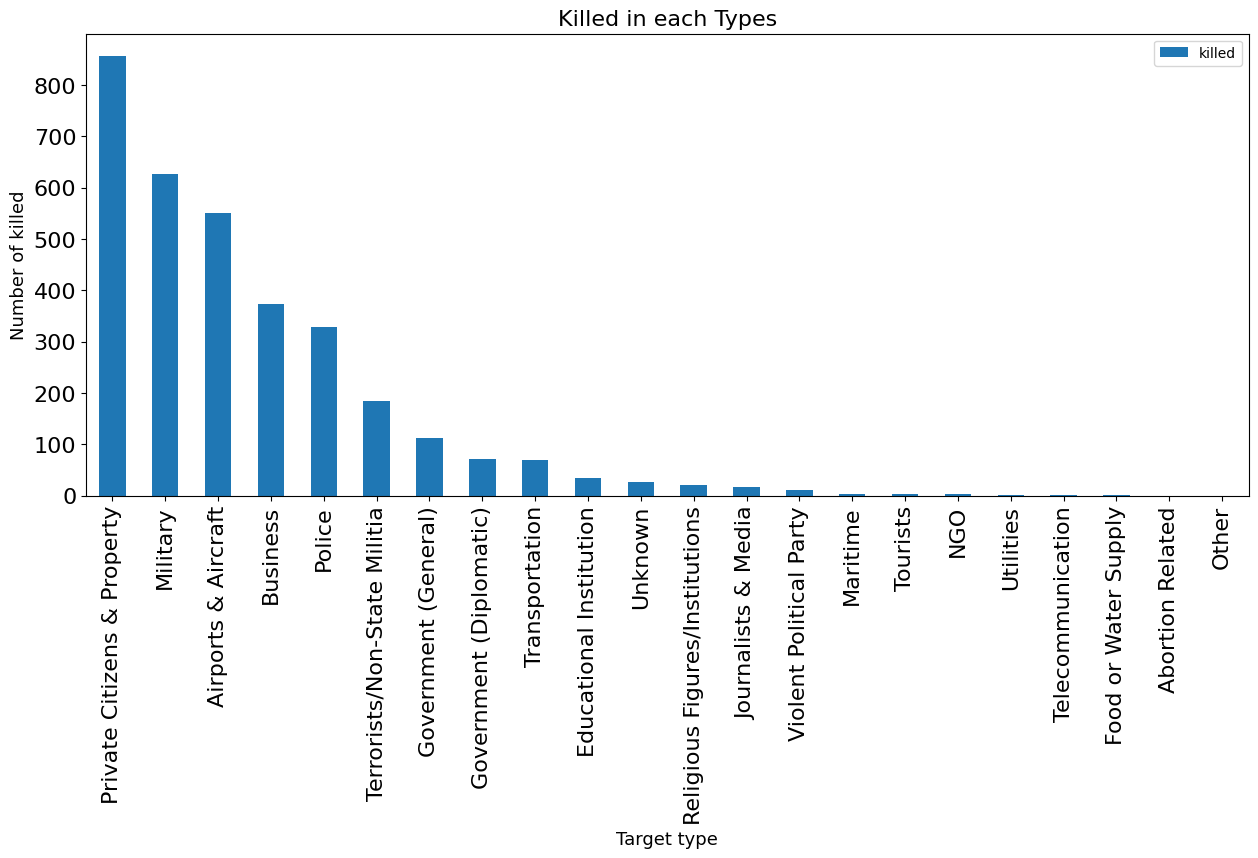

In [71]:
tk.plot(kind="bar",figsize=(15,6),fontsize=16)
plt.title("Killed in each Types",fontsize=16)
plt.xlabel("Target type",fontsize=13)
plt.ylabel("Number of killed",fontsize= 13)
plt.show()

# Wounded by each Types of Targets

In [72]:
tw=df[["targtype1_txt","Wounded"]].groupby("targtype1_txt").sum().sort_values(by="Wounded",ascending=False)
tw

Wounded
targtype1_txt                          
Business                          929.0
Airports & Aircraft               822.0
Government (General)              479.0
Private Citizens & Property       377.0
Transportation                    216.0
Military                          202.0
Government (Diplomatic)           191.0
Police                            176.0
Educational Institution           169.0
Journalists & Media                36.0
Religious Figures/Institutions     36.0
Tourists                           13.0
Terrorists/Non-State Militia        9.0
Telecommunication                   4.0
Maritime                            3.0
Utilities                           2.0
NGO                                 1.0
Unknown                             0.0
Abortion Related                    0.0
Other                               0.0
Food or Water Supply                0.0
Violent Political Party             0.0

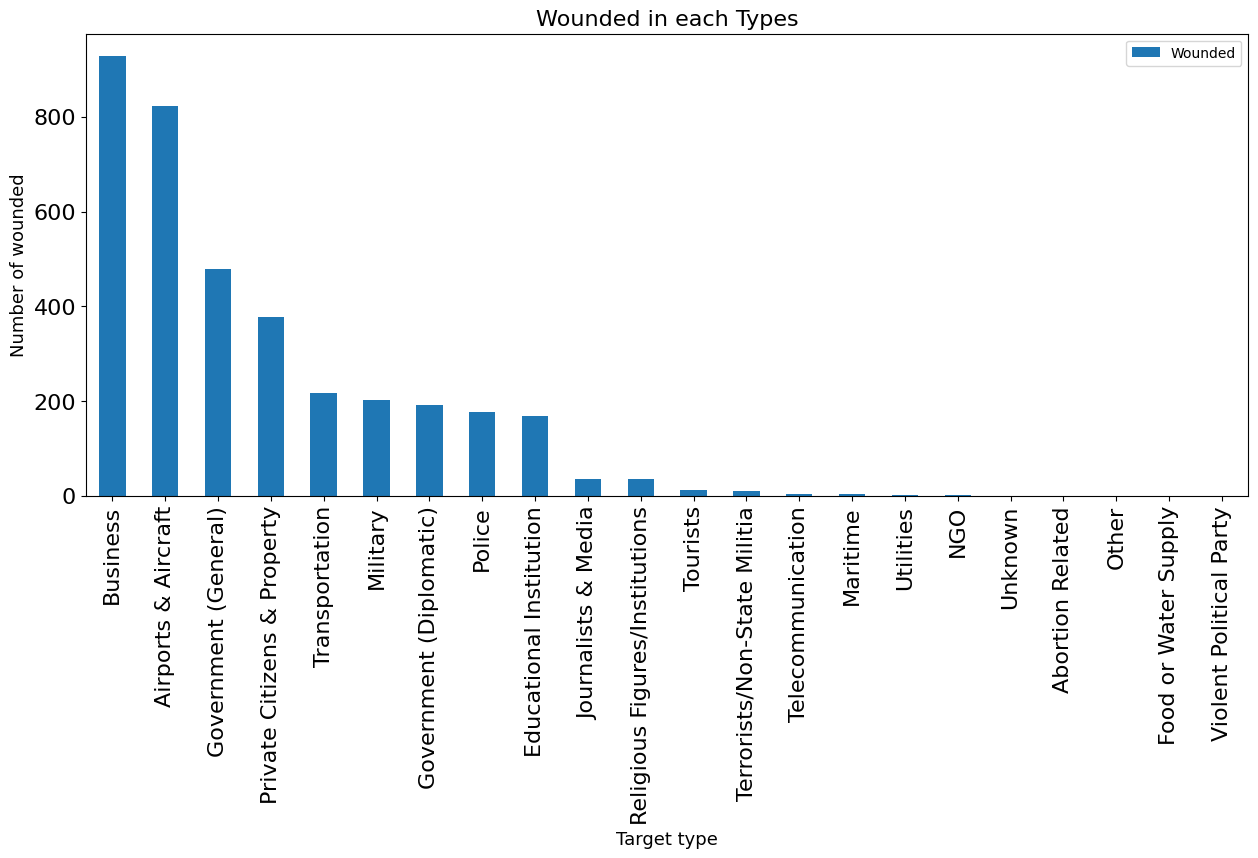

In [73]:
tw.plot(kind="bar",figsize=(15,6),fontsize=16)
plt.title("Wounded in each Types",fontsize=16)
plt.xlabel("Target type",fontsize=13)
plt.ylabel("Number of wounded",fontsize= 13)
plt.show()

#Sorting by number of attacks

In [74]:
gca=df[["Group Name","Country"]].value_counts().drop("Unknown").head(20)
gca

<ipython-input-74-b80a4e066809>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gca=df[["Group Name","Country"]].value_counts().drop("Unknown").head(20)


Group Name                                             Country       
Irish Republican Army (IRA)                            United Kingdom    656
Protestant extremists                                  United Kingdom    182
Left-Wing Militants                                    United States     169
Ulster Volunteer Force (UVF)                           United Kingdom    154
Basque Fatherland and Freedom (ETA)                    Spain              99
Montoneros (Argentina)                                 Argentina          88
Ulster Freedom Fighters (UFF)                          United Kingdom     88
Ejercito Revolucionaria del Pueblo (ERP) (Argentina)   Argentina          82
Black Nationalists                                     United States      82
Fuerzas Armadas de Liberacion Nacional (FALN)          United States      72
New World Liberation Front (NWLF)                      United States      72
Student Radicals                                       United States      71
Irish 

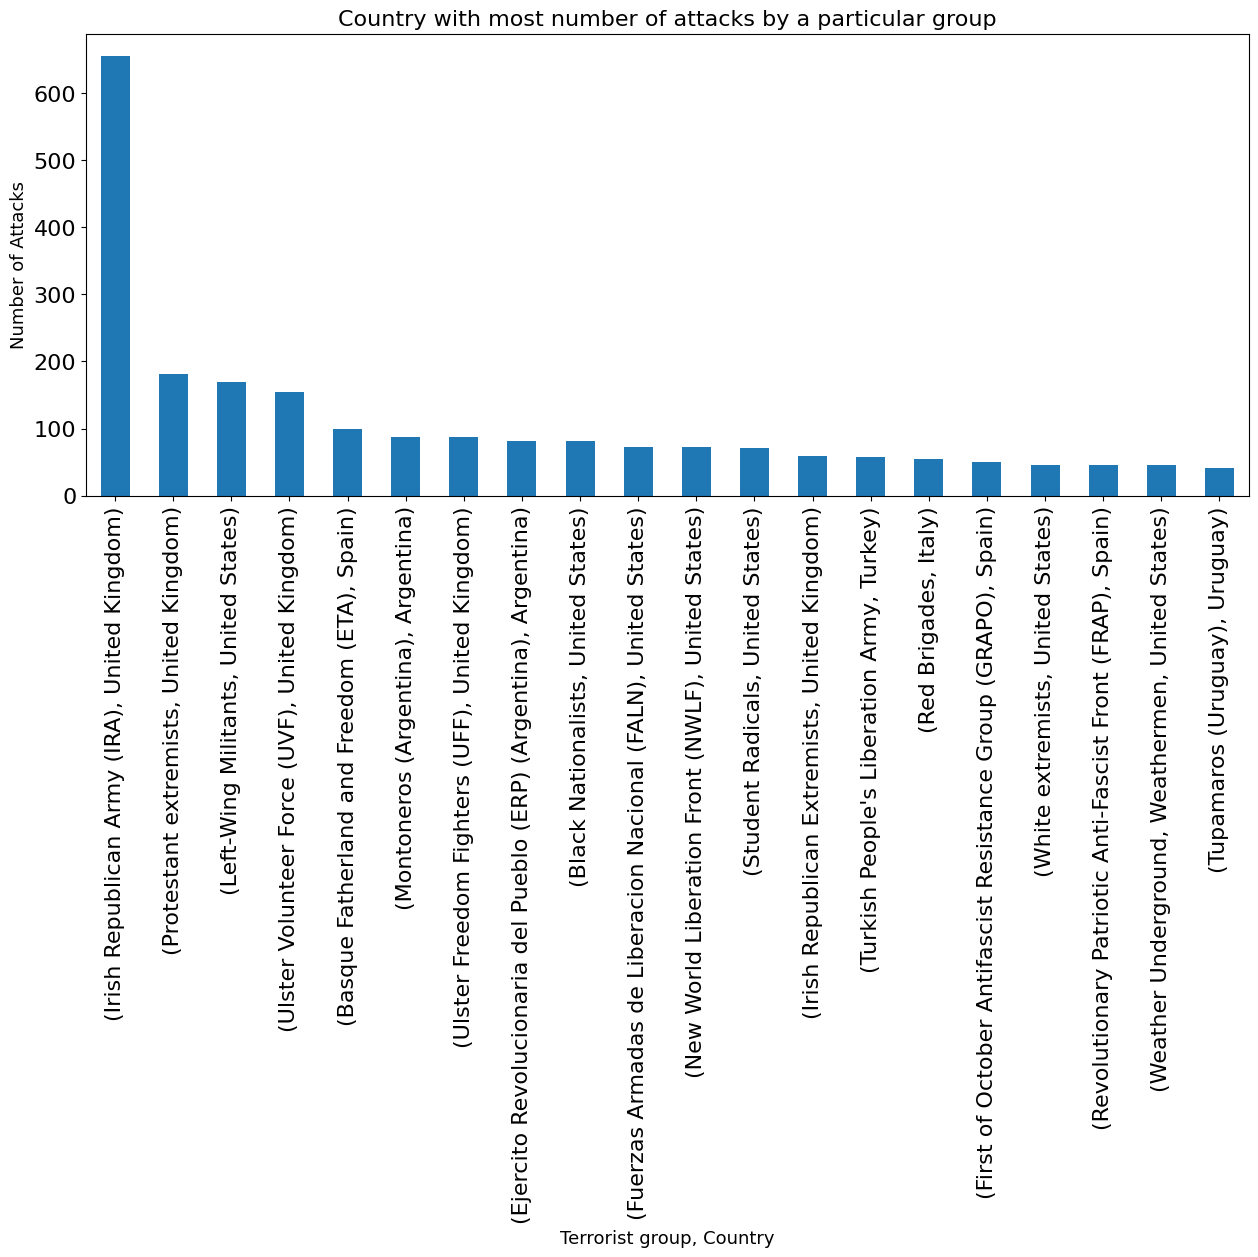

In [75]:
gca.plot(kind="bar",figsize=(15,6),fontsize=16)
plt.title("Country with most number of attacks by a particular group",fontsize=16)
plt.xlabel("Terrorist group, Country",fontsize=13)
plt.ylabel("Number of Attacks",fontsize= 13)
plt.show()

#Country wise Casualties by a particular Group

In [76]:
gcc=df[["Group Name","Country","Casualty"]].groupby(["Group Name","Country"]).sum().sort_values(by="Casualty",ascending=False).drop("Unknown").head(10)
gcc

<ipython-input-76-f3ef58280bcc>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gcc=df[["Group Name","Country","Casualty"]].groupby(["Group Name","Country"]).sum().sort_values(by="Casualty",ascending=False).drop("Unknown").head(10)


Casualty
Group Name                                         Country                 
Irish Republican Army (IRA)                        United Kingdom    1702.0
Montoneros (Argentina)                             Argentina          296.0
Ulster Volunteer Force (UVF)                       United Kingdom     232.0
Protestant extremists                              United Kingdom     214.0
Democratic Front for the Liberation of Palestin... Israel             188.0
Black Order                                        Italy              173.0
Basque Fatherland and Freedom (ETA)                Spain              136.0
Maskini Liberation Front                           Kenya              127.0
Popular Front for the Liberation of Palestine (... Israel             121.0
Ulster Freedom Fighters (UFF)                      United Kingdom     101.0

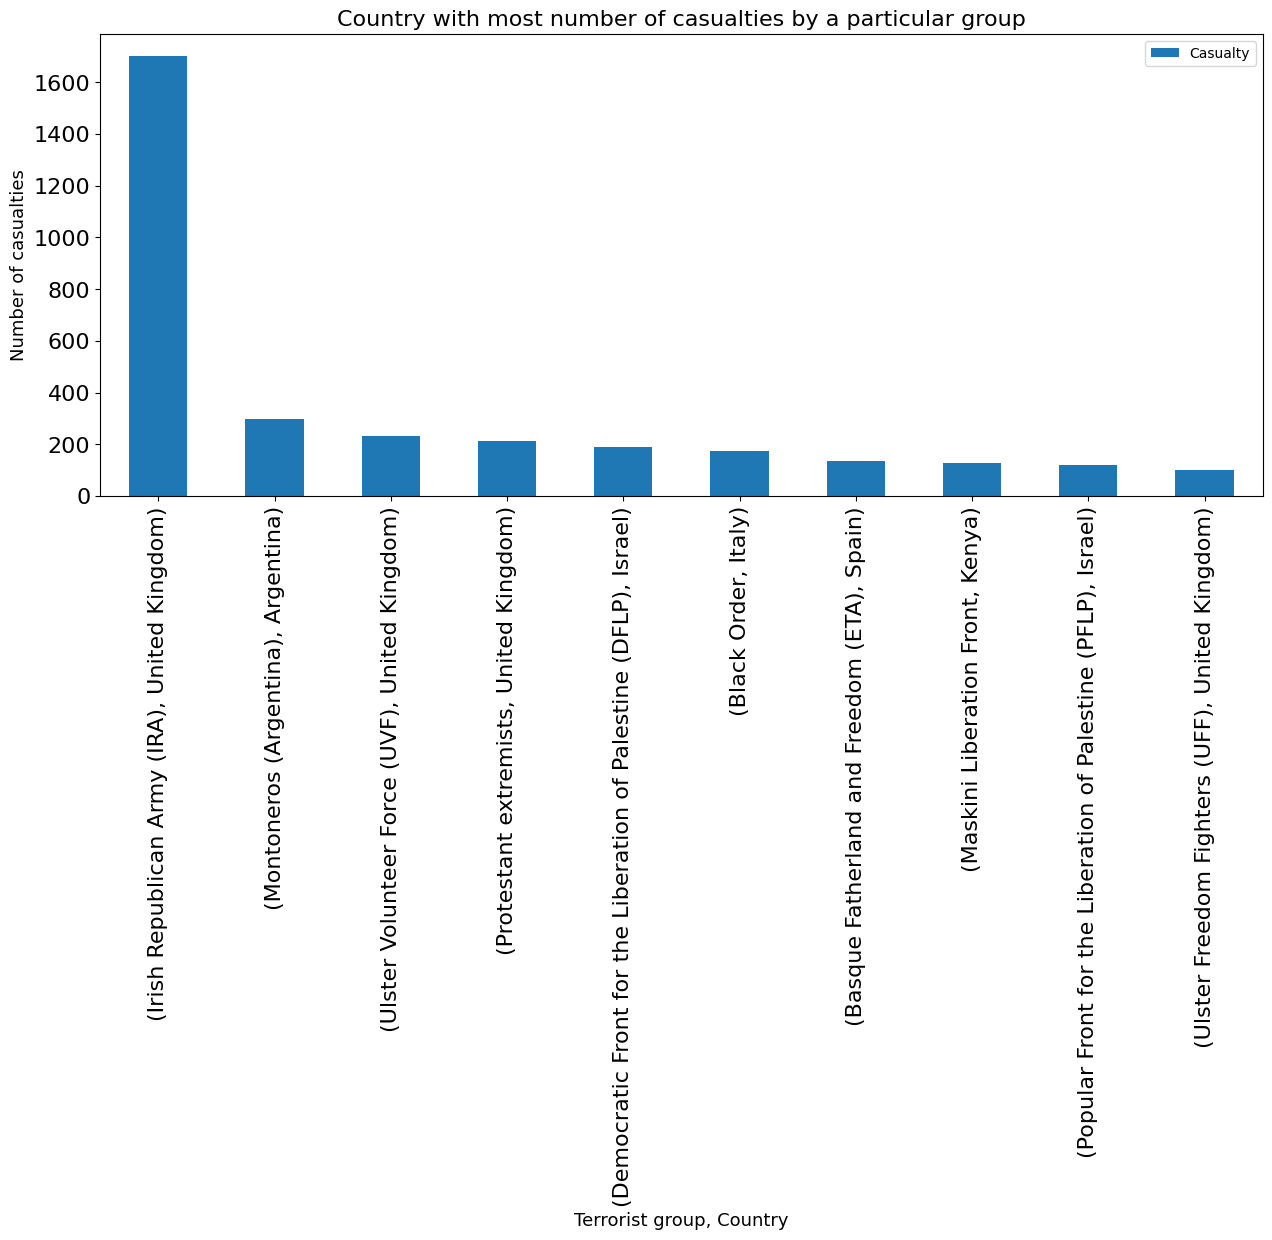

In [77]:
gcc.plot(kind="bar",figsize=(15,6),fontsize=16)
plt.title("Country with most number of casualties by a particular group",fontsize=16)
plt.xlabel("Terrorist group, Country",fontsize=13)
plt.ylabel("Number of casualties",fontsize= 13)
plt.show()

#Country wise Killed by a particular Group

In [78]:
gck=df[["Group Name","Country","killed"]].groupby(["Group Name","Country"]).sum().sort_values(by="killed",ascending=False).drop("Unknown").head(10)
gck

<ipython-input-78-3c9cceccb922>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gck=df[["Group Name","Country","killed"]].groupby(["Group Name","Country"]).sum().sort_values(by="killed",ascending=False).drop("Unknown").head(10)


killed
Group Name                                         Country               
Irish Republican Army (IRA)                        United Kingdom   804.0
Ulster Volunteer Force (UVF)                       United Kingdom   231.0
Protestant extremists                              United Kingdom   214.0
Montoneros (Argentina)                             Argentina        187.0
Ulster Freedom Fighters (UFF)                      United Kingdom   100.0
Popular Front for the Liberation of Palestine, ... Greece            88.0
Irish Republican Extremists                        United Kingdom    75.0
Coordination of the United Revolutionary Organi... Barbados          73.0
23rd of September Communist League                 Mexico            63.0
Basque Fatherland and Freedom (ETA)                Spain             52.0

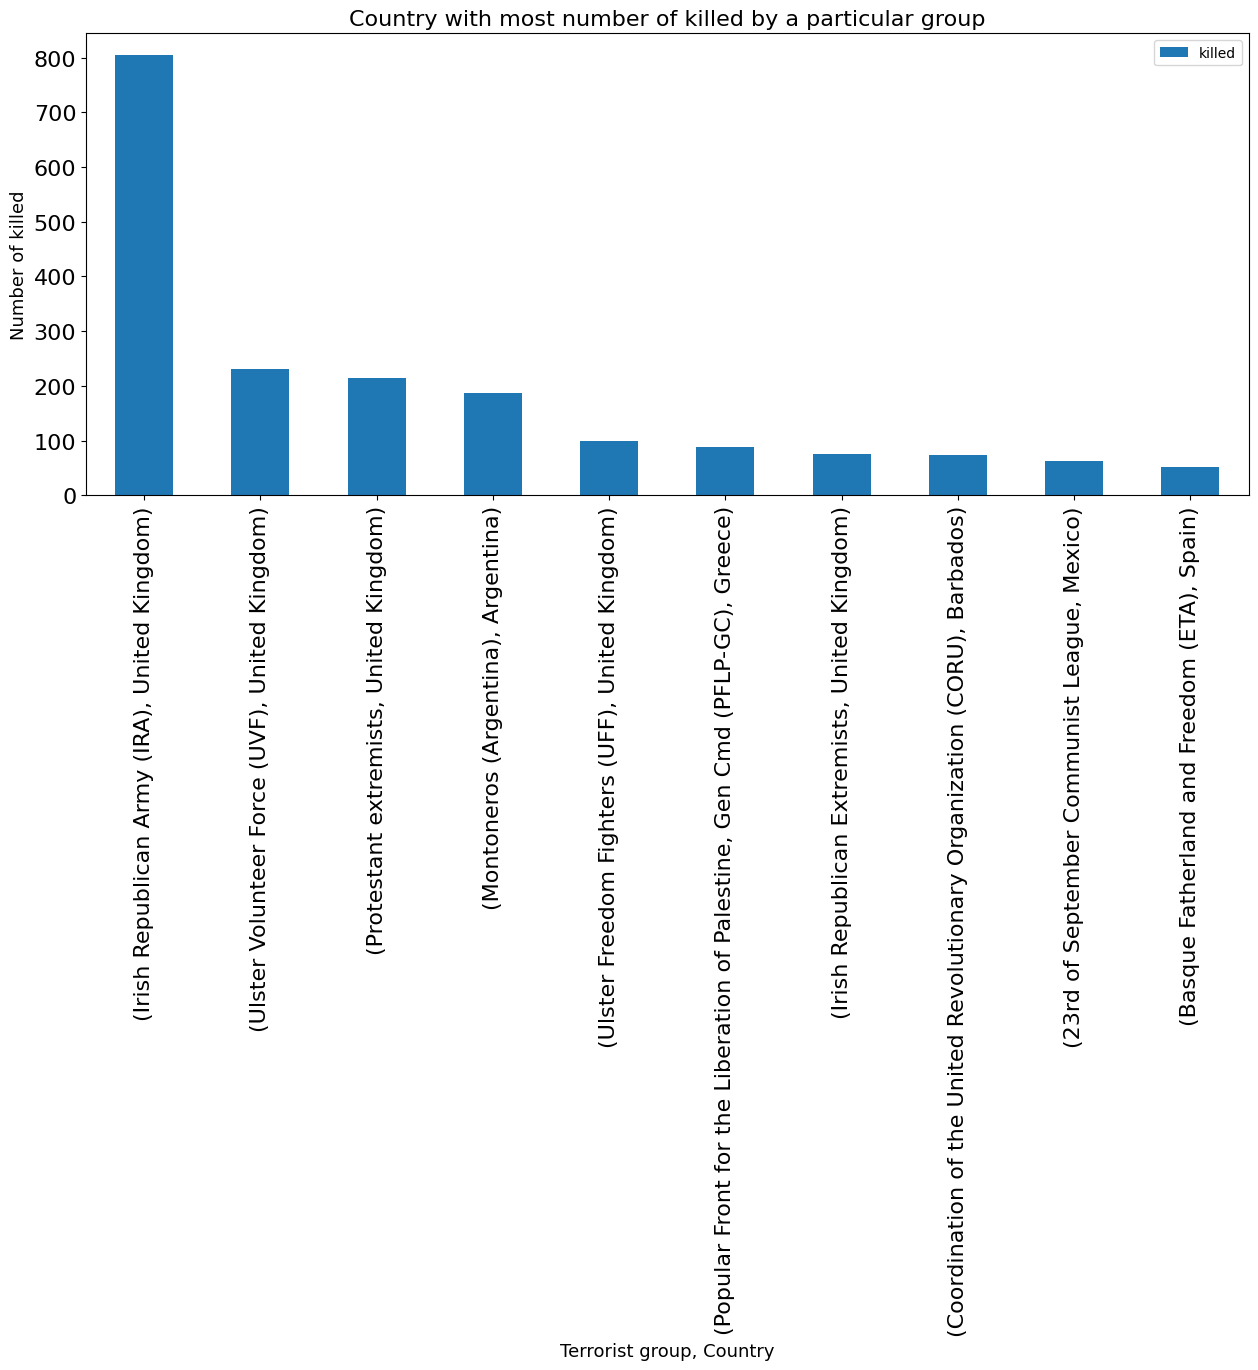

In [79]:
gck.plot(kind="bar",figsize=(15,6),fontsize=16)
plt.title("Country with most number of killed by a particular group",fontsize=16)
plt.xlabel("Terrorist group, Country",fontsize=13)
plt.ylabel("Number of killed",fontsize= 13)
plt.show()

#Country wise Wounded by a particular Group

In [80]:
gcw=df[["Group Name","Country","Wounded"]].groupby(["Group Name","Country"]).sum().sort_values(by="Wounded",ascending=False).drop("Unknown").head(10)
gcw

<ipython-input-80-ad000675327c>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gcw=df[["Group Name","Country","Wounded"]].groupby(["Group Name","Country"]).sum().sort_values(by="Wounded",ascending=False).drop("Unknown").head(10)


Wounded
Group Name                                         Country                
Irish Republican Army (IRA)                        United Kingdom    898.0
Black Order                                        Italy             152.0
Democratic Front for the Liberation of Palestin... Israel            150.0
Montoneros (Argentina)                             Argentina         109.0
Maskini Liberation Front                           Kenya             100.0
Popular Front for the Liberation of Palestine (... Israel             93.0
Basque Fatherland and Freedom (ETA)                Spain              84.0
Croatian Nationalists                              United States      80.0
Japanese Red Army (JRA)                            Israel             72.0
Black Panthers                                     United States      68.0

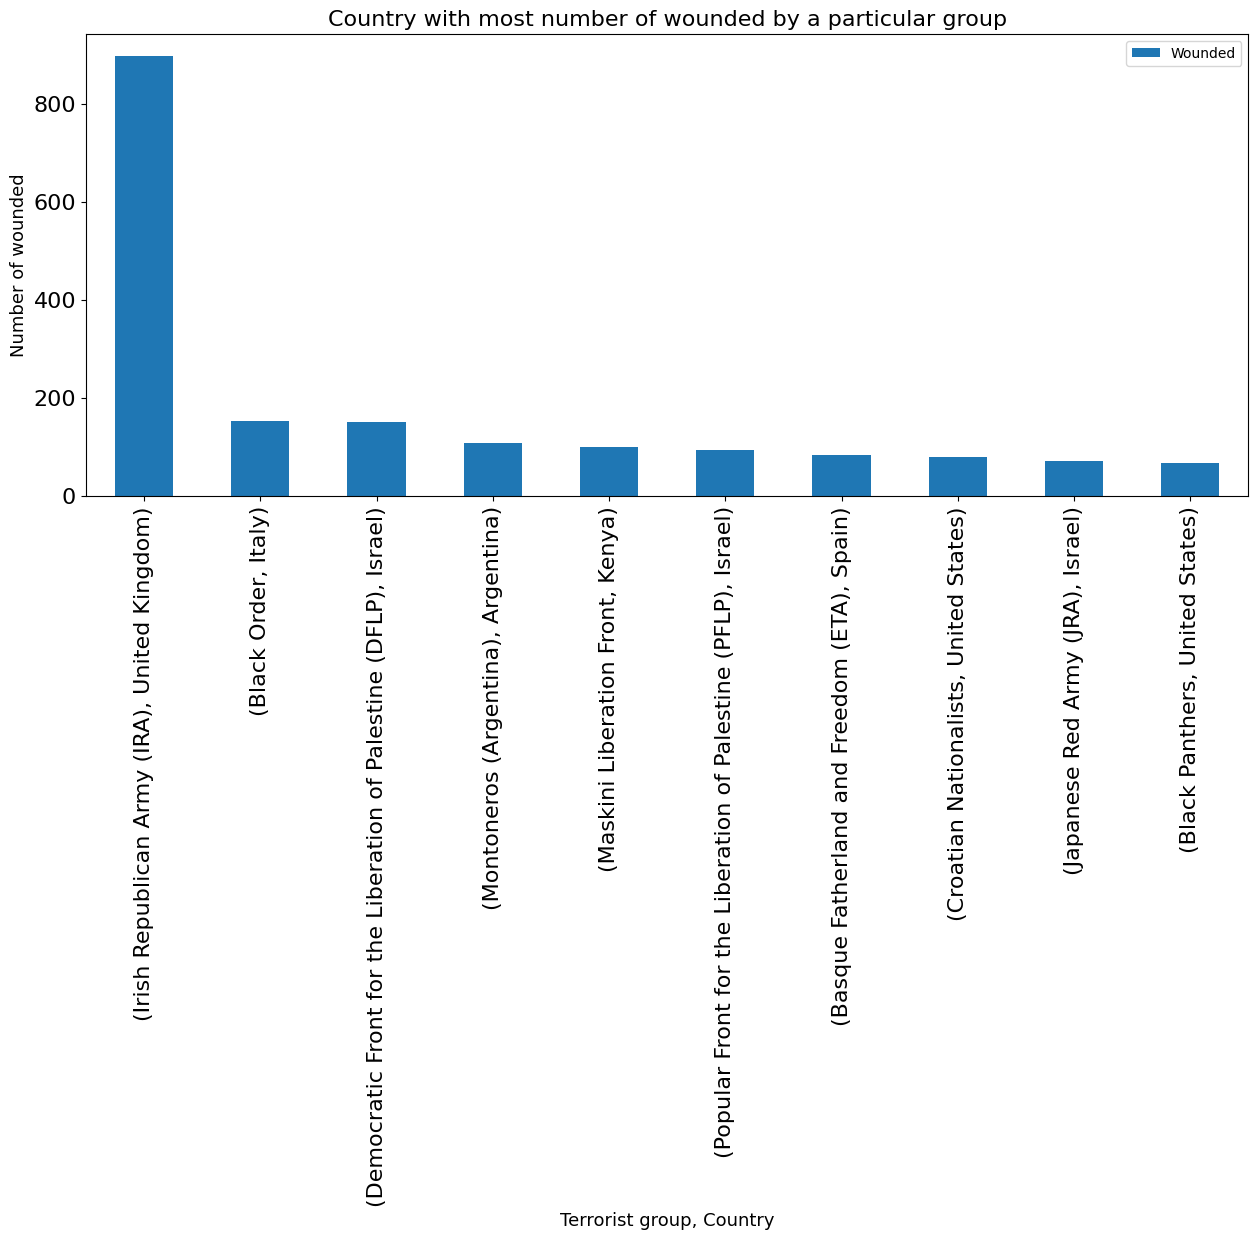

In [81]:
gcw.plot(kind="bar",figsize=(15,6),fontsize=16)
plt.title("Country with most number of wounded by a particular group",fontsize=16)
plt.xlabel("Terrorist group, Country",fontsize=13)
plt.ylabel("Number of wounded",fontsize= 13)
plt.show()

In [82]:
Casualty= df.loc[:,"Casualty"].sum()
print("Total number of casualties due to terrorist attacks from 1970 to 2017 across the world : ",Casualty)

Total number of casualties due to terrorist attacks from 1970 to 2017 across the world :  6965.0


In [83]:
kill= df.loc[:,"killed"].sum()
print("Total number of killed due to terrorist attacks from 1970 to 2017 across the world : ",kill)

Total number of killed due to terrorist attacks from 1970 to 2017 across the world :  3300.0


In [84]:
wound= df.loc[:,"Wounded"].sum()
print("Total number of Wounded due to terrorist attacks from 1970 to 2017 across the world : ",wound)

Total number of Wounded due to terrorist attacks from 1970 to 2017 across the world :  3665.0
